<a href="https://colab.research.google.com/github/SophieShin/DeepLearning/blob/main/OptionVolatilityEstimation_2304.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##데이터 불러오기

In [ ]:
import os
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks')    ## 현재 작업 환경으로 설정한 경로를 입력

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('data.csv', encoding = 'cp949')

In [ ]:
data

,ISU_CD,ISU_NM,BAS_DD,MKT_ID,SECUGRP_ID,ULY_ID,FUTOPT_TP_CD,EXER_PRC,CONTRTSZ,VOLT,...,VEGA,THETA,RHO,SETLMULT,FINAL_VOLT_TP_CD,ULY_PRC,REMAIN_DYS,RISKFRE_INT,DIV_PRSNT_VAL,VKOSPI
0,KR4201PC2759,코스피200 C 201912 275.0,20191202,DRV,OP,K2I,C,275,"250,000",0.158,...,18.3504,-50.2364,5.1966,"250,000",IL,277.44,11,0.0153,0.0,13.96
1,KR4201PC2775,코스피200 C 201912 277.5,20191202,DRV,OP,K2I,C,278,"250,000",0.150,...,19.3086,-50.1678,4.1662,"250,000",IL,277.44,11,0.0153,0.0,13.96
2,KR4201PC2809,코스피200 C 201912 280.0,20191202,DRV,OP,K2I,C,280,"250,000",0.145,...,18.7416,-45.5808,3.0304,"250,000",IL,277.44,11,0.0153,0.0,13.96
3,KR4201PC2825,코스피200 C 201912 282.5,20191202,DRV,OP,K2I,C,283,"250,000",0.140,...,13.6701,-35.8919,1.9514,"250,000",IL,277.44,11,0.0153,0.0,13.96
4,KR4201PC2858,코스피200 C 201912 285.0,20191202,DRV,OP,K2I,C,285,"250,000",0.137,...,10.3785,-24.4912,1.1206,"250,000",IL,277.44,11,0.0153,0.0,13.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82390,KR4205T43258,미니코스피 C 202304 325.0,20230406,DRV,OP,MKI,C,325,"50,000",0.141,...,10.2973,-37.6292,1.0508,"50,000",IL,317.82,8,0.0359,0.0,15.87
82391,KR4205T43324,미니코스피 C 202304 332.5,20230406,DRV,OP,MKI,C,333,"50,000",0.136,...,1.4712,-5.1674,0.0929,"50,000",IL,317.82,8,0.0359,0.0,15.87
82392,KR4305T43074,미니코스피 P 202304 307.5,20230406,DRV,OP,MKI,P,308,"50,000",0.149,...,6.2902,-18.5827,-0.4271,"50,000",IL,317.82,8,0.0359,0.0,15.87
82393,KR4305T43108,미니코스피 P 202304 310.0,20230406,DRV,OP,MKI,P,310,"50,000",0.148,...,9.2734,-30.1862,-0.8327,"50,000",IL,317.82,8,0.0359,0.0,15.87


In [ ]:
data['SCALED_EXER_PRC'] = data['EXER_PRC'] - data['ULY_PRC']

In [ ]:
data

,ISU_CD,ISU_NM,BAS_DD,MKT_ID,SECUGRP_ID,ULY_ID,FUTOPT_TP_CD,EXER_PRC,CONTRTSZ,VOLT,...,THETA,RHO,SETLMULT,FINAL_VOLT_TP_CD,ULY_PRC,REMAIN_DYS,RISKFRE_INT,DIV_PRSNT_VAL,VKOSPI,SCALED_EXER_PRC
0,KR4201PC2759,코스피200 C 201912 275.0,20191202,DRV,OP,K2I,C,275,"250,000",0.158,...,-50.2364,5.1966,"250,000",IL,277.44,11,0.0153,0.0,13.96,-2.44
1,KR4201PC2775,코스피200 C 201912 277.5,20191202,DRV,OP,K2I,C,278,"250,000",0.150,...,-50.1678,4.1662,"250,000",IL,277.44,11,0.0153,0.0,13.96,0.56
2,KR4201PC2809,코스피200 C 201912 280.0,20191202,DRV,OP,K2I,C,280,"250,000",0.145,...,-45.5808,3.0304,"250,000",IL,277.44,11,0.0153,0.0,13.96,2.56
3,KR4201PC2825,코스피200 C 201912 282.5,20191202,DRV,OP,K2I,C,283,"250,000",0.140,...,-35.8919,1.9514,"250,000",IL,277.44,11,0.0153,0.0,13.96,5.56
4,KR4201PC2858,코스피200 C 201912 285.0,20191202,DRV,OP,K2I,C,285,"250,000",0.137,...,-24.4912,1.1206,"250,000",IL,277.44,11,0.0153,0.0,13.96,7.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82390,KR4205T43258,미니코스피 C 202304 325.0,20230406,DRV,OP,MKI,C,325,"50,000",0.141,...,-37.6292,1.0508,"50,000",IL,317.82,8,0.0359,0.0,15.87,7.18
82391,KR4205T43324,미니코스피 C 202304 332.5,20230406,DRV,OP,MKI,C,333,"50,000",0.136,...,-5.1674,0.0929,"50,000",IL,317.82,8,0.0359,0.0,15.87,15.18
82392,KR4305T43074,미니코스피 P 202304 307.5,20230406,DRV,OP,MKI,P,308,"50,000",0.149,...,-18.5827,-0.4271,"50,000",IL,317.82,8,0.0359,0.0,15.87,-9.82
82393,KR4305T43108,미니코스피 P 202304 310.0,20230406,DRV,OP,MKI,P,310,"50,000",0.148,...,-30.1862,-0.8327,"50,000",IL,317.82,8,0.0359,0.0,15.87,-7.82


In [ ]:
data.shape

(82395, 36)

In [ ]:
data.info()
# null값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82395 entries, 0 to 82394
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISU_CD               82395 non-null  object 
 1   ISU_NM               82395 non-null  object 
 2   BAS_DD               82395 non-null  int64  
 3   MKT_ID               82395 non-null  object 
 4   SECUGRP_ID           82395 non-null  object 
 5   ULY_ID               82395 non-null  object 
 6   FUTOPT_TP_CD         82395 non-null  object 
 7   EXER_PRC             82395 non-null  int64  
 8   CONTRTSZ             82395 non-null  object 
 9   VOLT                 82395 non-null  float64
 10  INDVDL_CLSPRC_VOLT   82395 non-null  float64
 11  INDVDL_ASKORD_VOLT   82395 non-null  float64
 12  INDVDL_BIDORD_VOLT   82395 non-null  float64
 13  BSTORD_AVG_IMP_VOLT  82395 non-null  float64
 14  AVG_CLSPRC_VOLT      82395 non-null  float64
 15  AVG_BIDORD_VOLT      82395 non-null 

In [ ]:
#Remaining Days의 자료형이 정수가 아니라 문자열(object)로 되어 있어, 정수형으로 변환
data['REMAIN_DYS'] =data['REMAIN_DYS'].astype(int) 

In [ ]:
#자료형 변환 성공 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82395 entries, 0 to 82394
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISU_CD               82395 non-null  object 
 1   ISU_NM               82395 non-null  object 
 2   BAS_DD               82395 non-null  int64  
 3   MKT_ID               82395 non-null  object 
 4   SECUGRP_ID           82395 non-null  object 
 5   ULY_ID               82395 non-null  object 
 6   FUTOPT_TP_CD         82395 non-null  object 
 7   EXER_PRC             82395 non-null  int64  
 8   CONTRTSZ             82395 non-null  object 
 9   VOLT                 82395 non-null  float64
 10  INDVDL_CLSPRC_VOLT   82395 non-null  float64
 11  INDVDL_ASKORD_VOLT   82395 non-null  float64
 12  INDVDL_BIDORD_VOLT   82395 non-null  float64
 13  BSTORD_AVG_IMP_VOLT  82395 non-null  float64
 14  AVG_CLSPRC_VOLT      82395 non-null  float64
 15  AVG_BIDORD_VOLT      82395 non-null 

In [ ]:
data.columns

Index(['ISU_CD', 'ISU_NM', 'BAS_DD', 'MKT_ID', 'SECUGRP_ID', 'ULY_ID',
       'FUTOPT_TP_CD', 'EXER_PRC', 'CONTRTSZ', 'VOLT', 'INDVDL_CLSPRC_VOLT',
       'INDVDL_ASKORD_VOLT', 'INDVDL_BIDORD_VOLT', 'BSTORD_AVG_IMP_VOLT',
       'AVG_CLSPRC_VOLT', 'AVG_BIDORD_VOLT', 'AVG_ASKORD_VOLT', 'AVG_ORD_VOLT',
       'REP_IMP_VOLT', 'HIST_VOLT', 'CLSPRC', 'ASK_BSTORD_PRC',
       'BID_BSTORD_PRC', 'DELTA', 'GAMMA', 'VEGA', 'THETA', 'RHO', 'SETLMULT',
       'FINAL_VOLT_TP_CD', 'ULY_PRC', 'REMAIN_DYS', 'RISKFRE_INT',
       'DIV_PRSNT_VAL', 'VKOSPI', 'SCALED_EXER_PRC'],
      dtype='object')

In [ ]:
data[['CLSPRC','SCALED_EXER_PRC', 'REMAIN_DYS', 'RISKFRE_INT', 'DIV_PRSNT_VAL', 'ULY_PRC','VKOSPI', 'VOLT']].describe()

,CLSPRC,SCALED_EXER_PRC,REMAIN_DYS,RISKFRE_INT,DIV_PRSNT_VAL,ULY_PRC,VKOSPI,VOLT
count,82395.000000,82395.000000,82395.000000,82395.000000,82395.000000,82395.000000,82395.000000,82395.000000
mean,1.678860,-13.181913,24.221373,0.015878,0.466296,344.824792,21.813317,0.253582
std,3.452973,43.042492,32.320293,0.010898,1.169692,55.473362,7.122336,0.130455
min,0.010000,-298.380000,1.000000,0.006300,0.000000,199.280000,12.550000,0.030000
25%,0.070000,-35.570000,8.000000,0.007300,0.000000,304.330000,17.340000,0.168000
50%,0.440000,-5.870000,21.000000,0.011500,0.000000,326.130000,19.990000,0.212000
75%,1.990000,13.150000,31.000000,0.019600,0.606700,395.660000,24.360000,0.299000
max,220.650000,232.910000,1095.000000,0.040700,21.456400,440.400000,69.240000,3.054000


In [ ]:
data.columns

Index(['ISU_CD', 'ISU_NM', 'BAS_DD', 'MKT_ID', 'SECUGRP_ID', 'ULY_ID',
       'FUTOPT_TP_CD', 'EXER_PRC', 'CONTRTSZ', 'VOLT', 'INDVDL_CLSPRC_VOLT',
       'INDVDL_ASKORD_VOLT', 'INDVDL_BIDORD_VOLT', 'BSTORD_AVG_IMP_VOLT',
       'AVG_CLSPRC_VOLT', 'AVG_BIDORD_VOLT', 'AVG_ASKORD_VOLT', 'AVG_ORD_VOLT',
       'REP_IMP_VOLT', 'HIST_VOLT', 'CLSPRC', 'ASK_BSTORD_PRC',
       'BID_BSTORD_PRC', 'DELTA', 'GAMMA', 'VEGA', 'THETA', 'RHO', 'SETLMULT',
       'FINAL_VOLT_TP_CD', 'ULY_PRC', 'REMAIN_DYS', 'RISKFRE_INT',
       'DIV_PRSNT_VAL', 'VKOSPI', 'SCALED_EXER_PRC'],
      dtype='object')

In [ ]:
# Feature(X)와 Target(y) 선언하기

X = data[['FUTOPT_TP_CD','CLSPRC', 'SCALED_EXER_PRC', 'REMAIN_DYS', 'RISKFRE_INT', 'DIV_PRSNT_VAL', 'ULY_PRC', 'VKOSPI']]
y = data[['VOLT']]

In [ ]:
feature_target = pd.concat([X,y], axis = 1)
feature_target

,FUTOPT_TP_CD,CLSPRC,SCALED_EXER_PRC,REMAIN_DYS,RISKFRE_INT,DIV_PRSNT_VAL,ULY_PRC,VKOSPI,VOLT
0,C,4.50,-2.44,11,0.0153,0.0,277.44,13.96,0.158
1,C,2.93,0.56,11,0.0153,0.0,277.44,13.96,0.150
2,C,1.75,2.56,11,0.0153,0.0,277.44,13.96,0.145
3,C,0.93,5.56,11,0.0153,0.0,277.44,13.96,0.140
4,C,0.45,7.56,11,0.0153,0.0,277.44,13.96,0.137
...,...,...,...,...,...,...,...,...,...
82390,C,0.52,7.18,8,0.0359,0.0,317.82,15.87,0.141
82391,C,0.03,15.18,8,0.0359,0.0,317.82,15.87,0.136
82392,P,0.19,-9.82,8,0.0359,0.0,317.82,15.87,0.149
82393,P,0.41,-7.82,8,0.0359,0.0,317.82,15.87,0.148


In [ ]:
# categorical data(CallPut) one-hot-encoding 하기
X_features_ohe = pd.get_dummies(X, columns = ['FUTOPT_TP_CD'])
X_features_ohe

,CLSPRC,SCALED_EXER_PRC,REMAIN_DYS,RISKFRE_INT,DIV_PRSNT_VAL,ULY_PRC,VKOSPI,FUTOPT_TP_CD_C,FUTOPT_TP_CD_P
0,4.50,-2.44,11,0.0153,0.0,277.44,13.96,1,0
1,2.93,0.56,11,0.0153,0.0,277.44,13.96,1,0
2,1.75,2.56,11,0.0153,0.0,277.44,13.96,1,0
3,0.93,5.56,11,0.0153,0.0,277.44,13.96,1,0
4,0.45,7.56,11,0.0153,0.0,277.44,13.96,1,0
...,...,...,...,...,...,...,...,...,...
82390,0.52,7.18,8,0.0359,0.0,317.82,15.87,1,0
82391,0.03,15.18,8,0.0359,0.0,317.82,15.87,1,0
82392,0.19,-9.82,8,0.0359,0.0,317.82,15.87,0,1
82393,0.41,-7.82,8,0.0359,0.0,317.82,15.87,0,1


## preprocessing

In [ ]:
X_features_ohe.columns

Index(['CLSPRC', 'SCALED_EXER_PRC', 'REMAIN_DYS', 'RISKFRE_INT',
       'DIV_PRSNT_VAL', 'ULY_PRC', 'VKOSPI', 'FUTOPT_TP_CD_C',
       'FUTOPT_TP_CD_P'],
      dtype='object')

In [ ]:
X_features_ohe.describe()


,CLSPRC,SCALED_EXER_PRC,REMAIN_DYS,RISKFRE_INT,DIV_PRSNT_VAL,ULY_PRC,VKOSPI,FUTOPT_TP_CD_C,FUTOPT_TP_CD_P
count,82395.000000,82395.000000,82395.000000,82395.000000,82395.000000,82395.000000,82395.000000,82395.000000,82395.000000
mean,1.678860,-13.181913,24.221373,0.015878,0.466296,344.824792,21.813317,0.415280,0.584720
std,3.452973,43.042492,32.320293,0.010898,1.169692,55.473362,7.122336,0.492773,0.492773
min,0.010000,-298.380000,1.000000,0.006300,0.000000,199.280000,12.550000,0.000000,0.000000
25%,0.070000,-35.570000,8.000000,0.007300,0.000000,304.330000,17.340000,0.000000,0.000000
50%,0.440000,-5.870000,21.000000,0.011500,0.000000,326.130000,19.990000,0.000000,1.000000
75%,1.990000,13.150000,31.000000,0.019600,0.606700,395.660000,24.360000,1.000000,1.000000
max,220.650000,232.910000,1095.000000,0.040700,21.456400,440.400000,69.240000,1.000000,1.000000


In [ ]:
import seaborn as sns

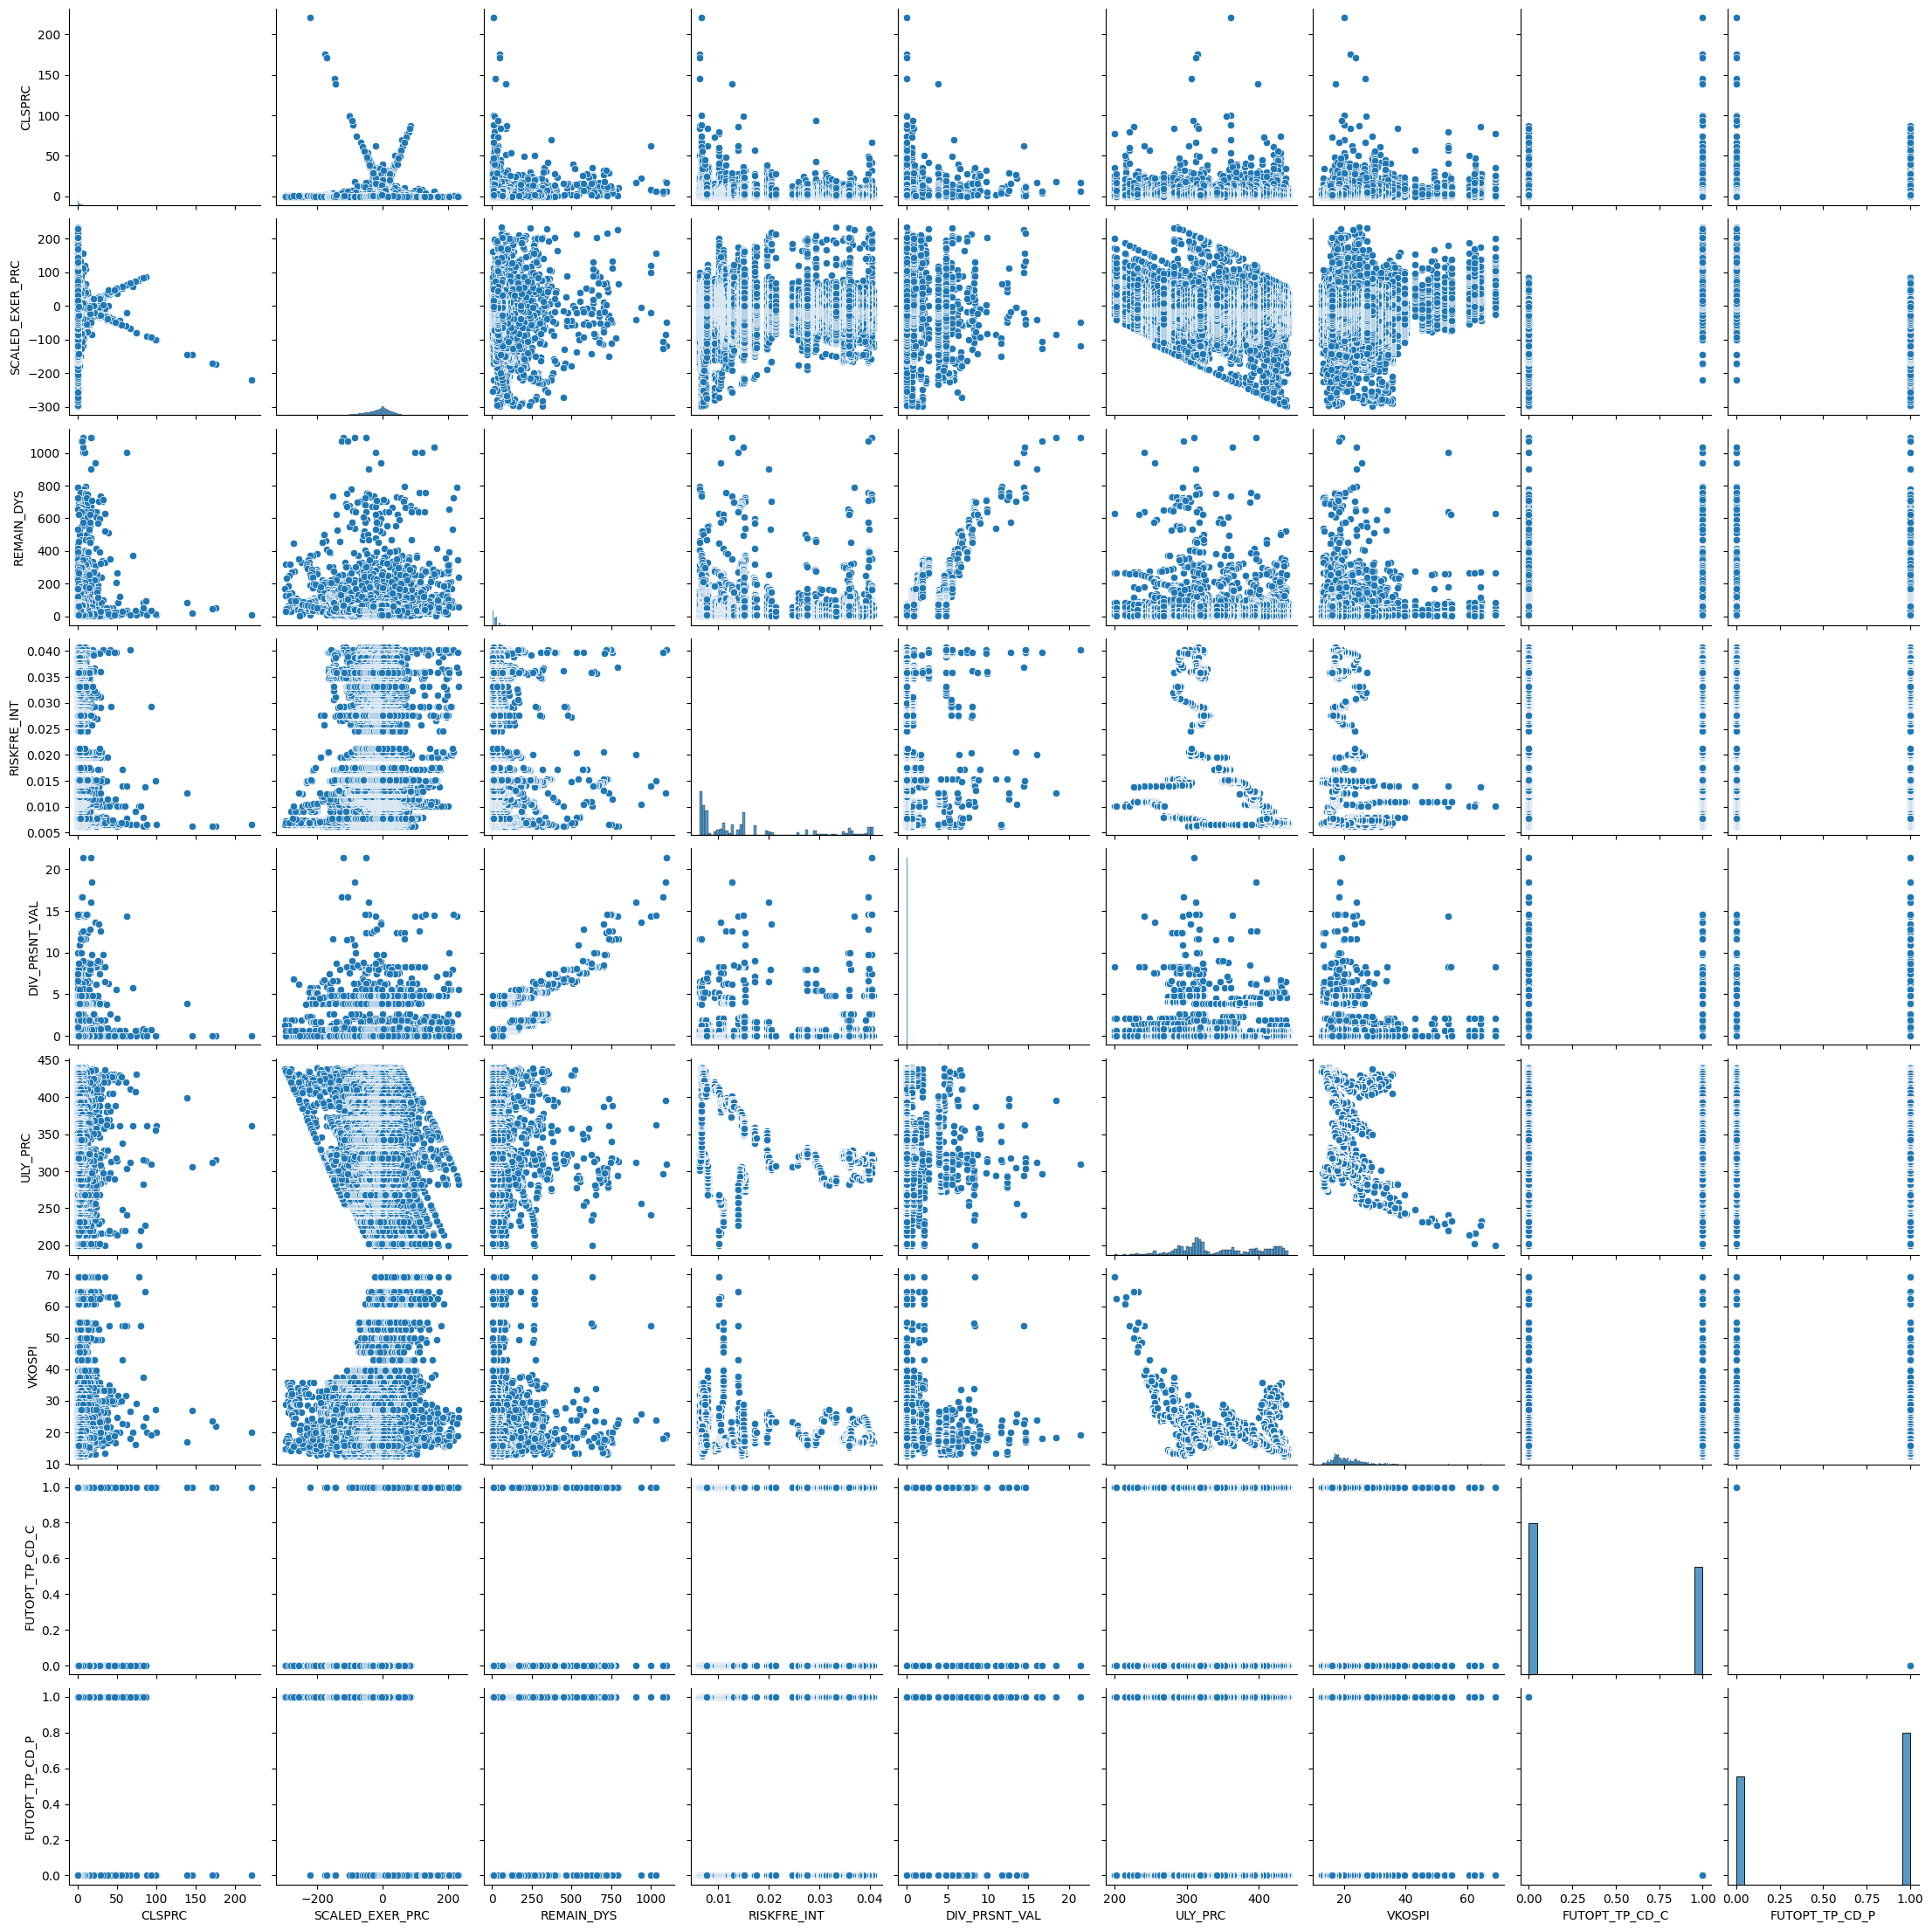

In [ ]:
sns.pairplot(X_features_ohe, diag_kind='hist')

plt.show()

In [ ]:
X_features_ohe.columns

Index(['CLSPRC', 'SCALED_EXER_PRC', 'REMAIN_DYS', 'RISKFRE_INT',
       'DIV_PRSNT_VAL', 'ULY_PRC', 'VKOSPI', 'FUTOPT_TP_CD_C',
       'FUTOPT_TP_CD_P'],
      dtype='object')

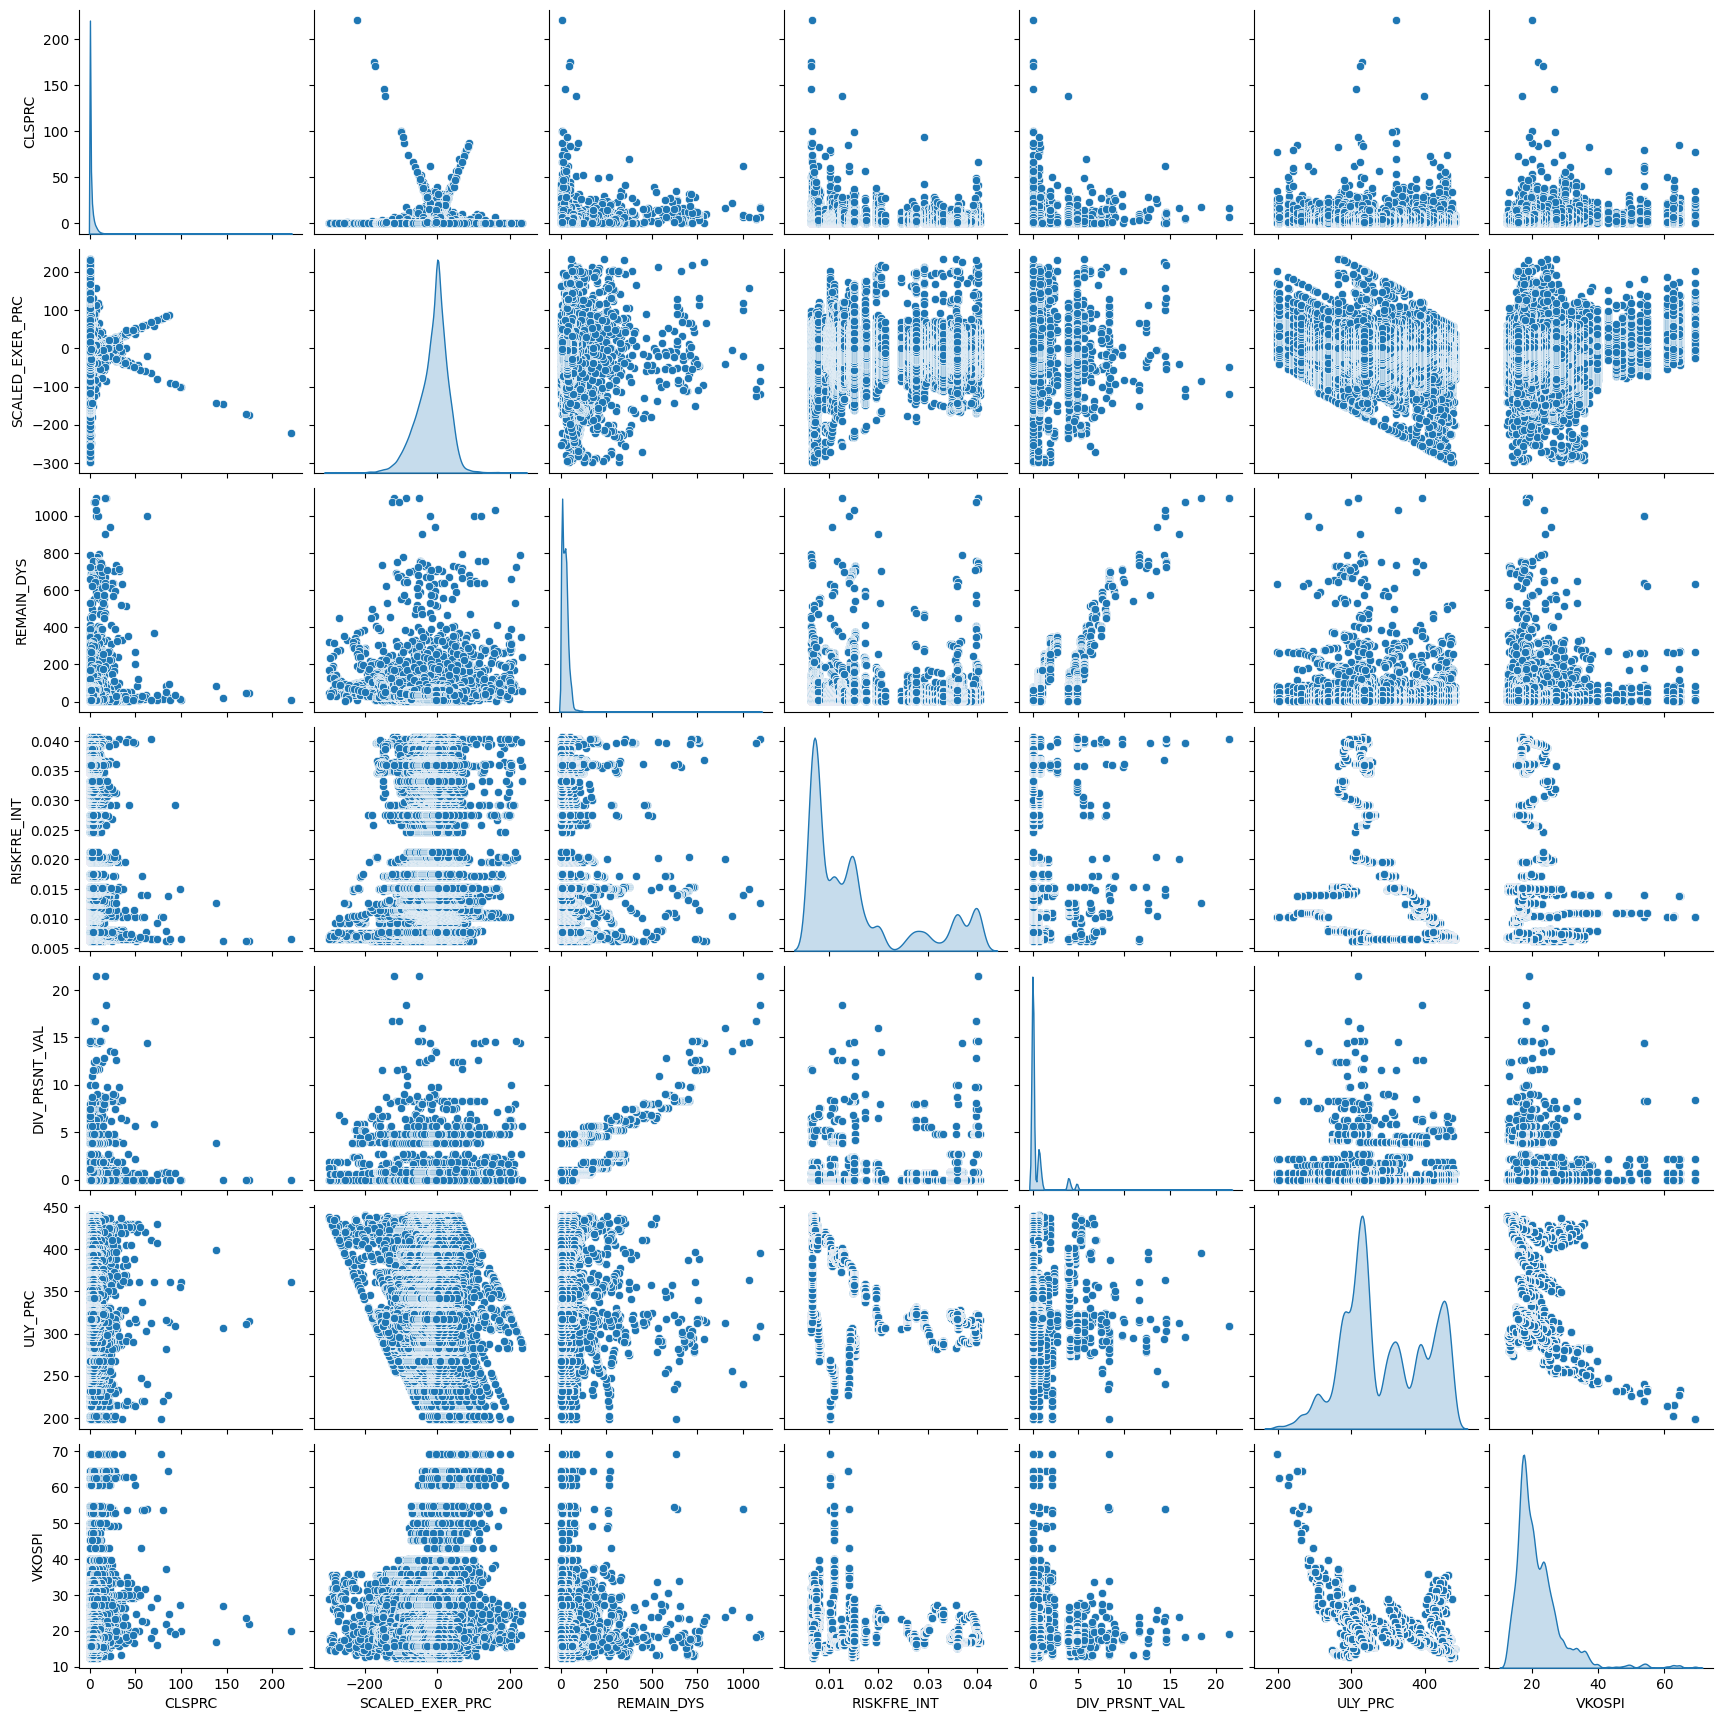

In [ ]:

      
sns.pairplot(X_features_ohe[['CLSPRC', 'SCALED_EXER_PRC', 'REMAIN_DYS', 'RISKFRE_INT',
       'DIV_PRSNT_VAL', 'ULY_PRC', 'VKOSPI']], diag_kind='kde')

plt.show()

<Axes: >

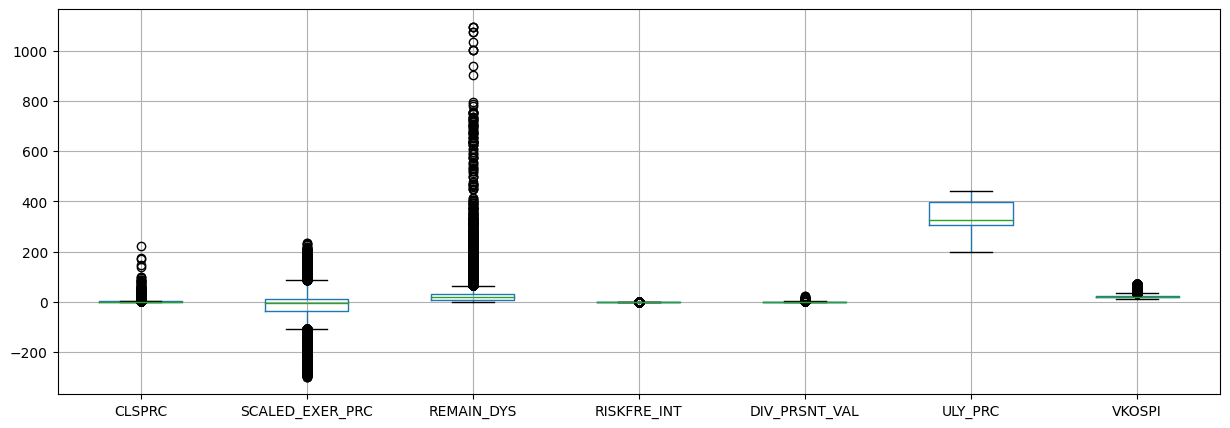

In [ ]:
# Scale 확인하기
X_features_ohe.boxplot(column =['CLSPRC', 'SCALED_EXER_PRC', 'REMAIN_DYS', 'RISKFRE_INT',
       'DIV_PRSNT_VAL', 'ULY_PRC', 'VKOSPI'] , figsize = (15,5))

<Axes: >

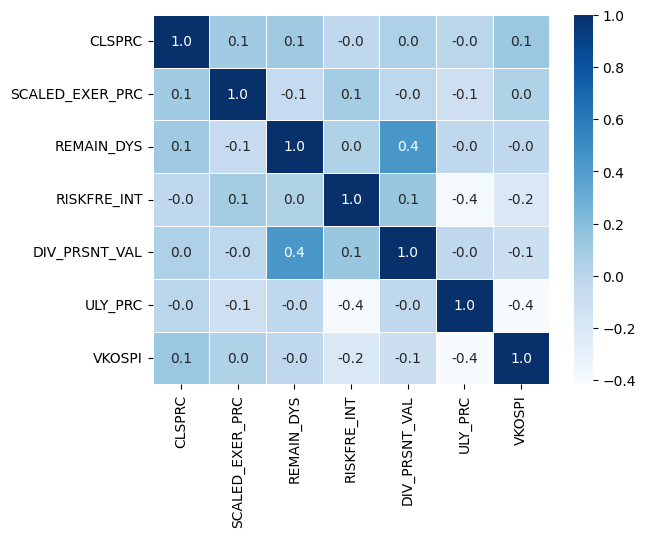

In [ ]:
# corr matrix
corr = X_features_ohe[['CLSPRC', 'SCALED_EXER_PRC', 'REMAIN_DYS', 'RISKFRE_INT',
       'DIV_PRSNT_VAL', 'ULY_PRC', 'VKOSPI']].corr()
sns.heatmap(corr, annot = True, fmt = '.1f', linewidths=.5, cmap = 'Blues')

In [ ]:
# !pip install mglearn

In [ ]:
#import mglearn 

# features =pd.DataFrame(X_features_ohe, columns=X_features_ohe.columns)
# pd.plotting.scatter_matrix(features, figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap=mglearn.cm3)

In [ ]:
# train, test set 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X_features_ohe, y, test_size=0.3, random_state=5)

In [ ]:
# 차원 확인

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((57676, 9), (24719, 9), (57676, 1), (24719, 1))

In [ ]:
# 정규화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
import os, random

# random seed 고정 
def set_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
#     tf.random.set_seed(seed) # Tensorflow 사용시 

SEED = 5
set_seeds(SEED)

## *Linear Regression 계열



In [ ]:
import statsmodels.api as sm

X = sm.add_constant(train_scaled)
est = sm.OLS(y_train, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   VOLT   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                 2.432e+04
Date:                Sat, 08 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:39:56   Log-Likelihood:                 78685.
No. Observations:               57676   AIC:                        -1.574e+05
Df Residuals:                   57667   BIC:                        -1.573e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2528      0.000    981.832      0.000       0.252       0.253
x1            -0.0144      0.000    -54.493      0.000      -0.015      -0.014
x2            -0.0780      0.000   -217.538      0.000      -0.079      -0.077
x3            -0.0009      0.000     -3.062      0.002      -0.001      -0.000
x4            -0.0033      0.000    -10.373      0.000      -0.004      -0.003
x5            -0.0019      0.000     -6.660      0.000      -0.002      -0.001
x6            -0.0072      0.000    -21.248      0.000      -0.008      -0.006
x7             0.0803      0.000    250.985      0.000       0.080       0.081
x8            -0.0005      0.000     -2.692      0.007      -0.001      -0.000
x9             0.0005      0.000      2.692      0.007       0.000       0.001
==============================================================================
Omnibus:                    56976.806   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12280252.094
Skew:                           4.346   Prob(JB):                         0.00
Kurtosis:                      73.954   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.44e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 1번 Linear Regression 모델

from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(train_scaled, y_train)
pred = lr.predict(test_scaled)

print('Training accuracy : {:.3f}'.format(lr.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(lr.score(test_scaled, y_test)))


Training accuracy : 0.771
Test accuracy : 0.765


In [ ]:
# 2번 Ridge 모델

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(ridge.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(ridge.score(test_scaled, y_test)))

Training accuracy : 0.771
Test accuracy : 0.765


In [ ]:
ridge10 = Ridge(alpha=10).fit(train_scaled, y_train)
ridge1 = Ridge(alpha=1).fit(train_scaled, y_train)
ridge01 = Ridge(alpha=0.1).fit(train_scaled, y_train)


In [ ]:
# Grid Search for Ridge
# https://velog.io/@emseoyk/하이퍼파라미터-튜닝
# https://datascienceschool.net/03%20machine%20learning/14.01%20%EB%AA%A8%ED%98%95%20%EC%B5%9C%EC%A0%81%ED%99%94.html

from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

grid = GridSearchCV(estimator = Ridge(), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring= 'r2', n_jobs = -1)
grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 7 candidates, totalling 28 fits
{'alpha': 10}
Ridge(alpha=10)
0.7711754985909831


In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.051435,0.012925,0.002592,0.000179,0.01,{'alpha': 0.01},0.767543,0.787328,0.756844,0.772986,0.771175,0.010986,7
1,0.048491,0.007100,0.008683,0.006844,0.05,{'alpha': 0.05},0.767543,0.787328,0.756844,0.772987,0.771175,0.010986,6
2,0.045172,0.006641,0.007752,0.004763,0.1,{'alpha': 0.1},0.767543,0.787328,0.756844,0.772987,0.771175,0.010986,5
3,0.067529,0.015906,0.008143,0.006237,0.5,{'alpha': 0.5},0.767543,0.787328,0.756844,0.772987,0.771175,0.010986,4
4,0.059116,0.001999,0.010651,0.004855,1,{'alpha': 1},0.767543,0.787328,0.756844,0.772987,0.771175,0.010986,3
5,0.068369,0.014267,0.016026,0.009338,5,{'alpha': 5},0.767543,0.787326,0.756842,0.772991,0.771175,0.010986,2
6,0.037031,0.015030,0.010488,0.002358,10,{'alpha': 10},0.767543,0.787324,0.756841,0.772995,0.771175,0.010986,1


In [ ]:
# 3번 Lasso 모델
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(lasso.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(lasso.score(test_scaled, y_test)))

Training accuracy : 0.750
Test accuracy : 0.741


In [ ]:
# Grid Search for Lasso

grid_search = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

grid = GridSearchCV(estimator = Lasso(), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring= 'r2', n_jobs = -1)
grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 7 candidates, totalling 28 fits
{'alpha': 0.01}
Lasso(alpha=0.01)
0.750365972909773


In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021133,0.002450,0.002712,0.000322,0.01,{'alpha': 0.01},0.746412,0.763118,0.734266,0.757668,0.750366,0.011076,1
1,0.019998,0.002336,0.004655,0.003089,0.05,{'alpha': 0.05},0.445720,0.452588,0.434424,0.452820,0.446388,0.007474,2
2,0.018616,0.004512,0.004067,0.002157,0.1,{'alpha': 0.1},-0.000002,-0.000131,-0.000134,-0.000004,-0.000068,0.000065,3
3,0.014797,0.001396,0.002443,0.000266,0.5,{'alpha': 0.5},-0.000002,-0.000131,-0.000134,-0.000004,-0.000068,0.000065,3
4,0.017777,0.002051,0.002950,0.000320,1,{'alpha': 1},-0.000002,-0.000131,-0.000134,-0.000004,-0.000068,0.000065,3
5,0.018293,0.004263,0.002514,0.000284,5,{'alpha': 5},-0.000002,-0.000131,-0.000134,-0.000004,-0.000068,0.000065,3
6,0.016484,0.002038,0.002624,0.000694,10,{'alpha': 10},-0.000002,-0.000131,-0.000134,-0.000004,-0.000068,0.000065,3


In [ ]:
lasso10 = Lasso(alpha=10).fit(train_scaled, y_train)
lasso1 = Lasso(alpha=1).fit(train_scaled, y_train)
lasso01 = Lasso(alpha=0.1).fit(train_scaled, y_train)

## * Tree 계열

In [ ]:
# 4 번 모델 Decision Tree(Single Model)

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 25, random_state=5)
dt.fit(train_scaled, y_train)

print('Training accuracy : {:.5f}'.format(dt.score(train_scaled, y_train)))
print('Test accuracy : {:.3f}'.format(dt.score(test_scaled, y_test)))

Training accuracy : 0.99980
Test accuracy : 0.933


In [ ]:
# Grid Search for DT

grid_search = {'max_depth': [5, 10, 15, 20, 25, 30, 35]}

grid = GridSearchCV(estimator =DecisionTreeRegressor(), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring = 'r2',  n_jobs = -1)
grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 7 candidates, totalling 28 fits
{'max_depth': 25}
DecisionTreeRegressor(max_depth=25)
0.9501554895343662


In [ ]:
# 튜닝후 재실행(Decision Tree)

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 25, random_state=5)
dt.fit(train_scaled, y_train)

print('Training accuracy : {:.5f}'.format(dt.score(train_scaled, y_train)))
print('Test accuracy : {:.3f}'.format(dt.score(test_scaled, y_test)))

Training accuracy : 0.99980
Test accuracy : 0.933


In [ ]:
dt.get_depth()

25

In [ ]:
dt.get_n_leaves()

43623

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
# 5번 모델 RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators = 100,n_jobs = -1,oob_score = True, random_state = 5)
forest.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(forest.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(forest.score(test_scaled, y_test)))

<ipython-input-112-32f536dc4b85>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_scaled, y_train)


Training accuracy : 0.996
Test accuracy : 0.971


In [ ]:
# Grid Search for Random Forest
# class_weight (불균형(imbalanced) 클래스인 경우)
# max_depth (너무 깊어지면 과적합)
# n_estimators (적을경우 과소적합, 높을경우 긴 학습시간)
# min_samples_leaf (과적합일경우 높임)
# max_features (줄일 수록 다양한 트리생성)
# 탐색 범위 정의
from sklearn.model_selection import GridSearchCV

grid_search = {'max_depth': [5, 10, 15, 20],
               'max_features':[2, 6, 9],
               'n_estimators' : [10, 50, 100]}

grid = GridSearchCV(estimator = RandomForestRegressor(), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring = 'r2',  n_jobs = -1)

grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 20, 'max_features': 6, 'n_estimators': 100}
RandomForestRegressor(max_depth=20, max_features=6)
0.9716471415764258


In [ ]:
# 파라미터 튜닝하여 재실행(5번 Random Forest Model)
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,max_depth = 20, max_features = 6, n_jobs = -1,oob_score = True, random_state = 5)
forest.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(forest.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(forest.score(test_scaled, y_test)))

<ipython-input-37-ad5c8932485f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_scaled, y_train)


Training accuracy : 0.996
Test accuracy : 0.973


<Axes: >

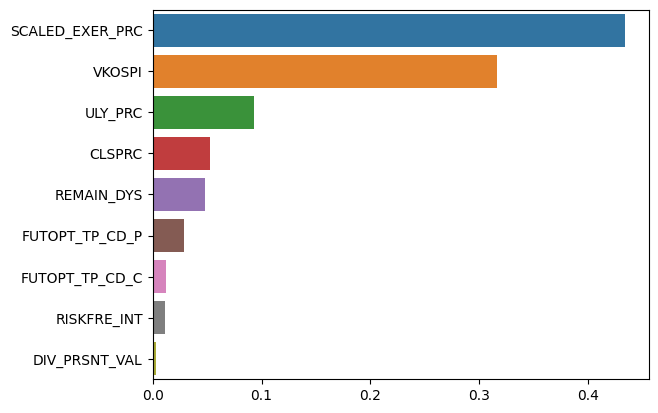

In [ ]:
# Random Forest feature importance 비교
import seaborn as sns
feature_series = pd.Series(data = forest.feature_importances_, index = X_features_ohe.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

In [ ]:
# 6번 모델 Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss= 'squared_error', random_state = 0)
gbr.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(gbr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(gbr.score(test_scaled, y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.947
test Accuracy: 0.938


In [ ]:
# Grid Search for GBR

grid_search = {'max_depth': [3, 5, 10, 20],
               'n_estimators':[20, 50, 100, 200]}

grid = GridSearchCV(estimator =GradientBoostingRegressor(), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring = 'r2', n_jobs = -1)
grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_depth': 10, 'n_estimators': 200}
GradientBoostingRegressor(max_depth=10, n_estimators=200)
0.975916999492726


In [ ]:
# 튜닝한 뒤 재실행(GBR)

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss= 'squared_error', max_depth = 10, n_estimators = 200, random_state = 0)
gbr.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(gbr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(gbr.score(test_scaled, y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.999
test Accuracy: 0.978


<Axes: >

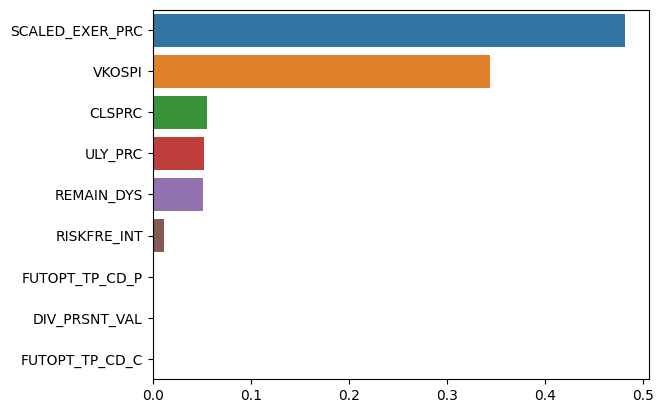

In [ ]:
# feature importance 비교

feature_series = pd.Series(data = gbr.feature_importances_, index = X_features_ohe.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

In [ ]:
# 7번 모델 AdaBoost 모델
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(learning_rate = 0.01,loss = 'square', random_state = 0)
abr.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(abr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(abr.score(test_scaled, y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.715
test Accuracy: 0.709


In [ ]:
# Grid Search for AdaBoost

grid_search = {'n_estimators': [5, 10, 25, 50],
               'learning_rate':[0.01, 0.1, 0.9]}

grid = GridSearchCV(estimator = AdaBoostRegressor(), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring = 'r2', n_jobs = -1)
grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.1, 'n_estimators': 50}
AdaBoostRegressor(learning_rate=0.1)
0.761716306434989


In [ ]:
# 튜닝한 뒤 재실행(AdaBoost)
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(learning_rate = 0.1, n_estimators = 50,loss = 'square', random_state = 0)
abr.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(abr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(abr.score(test_scaled, y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.755
test Accuracy: 0.747


<Axes: >

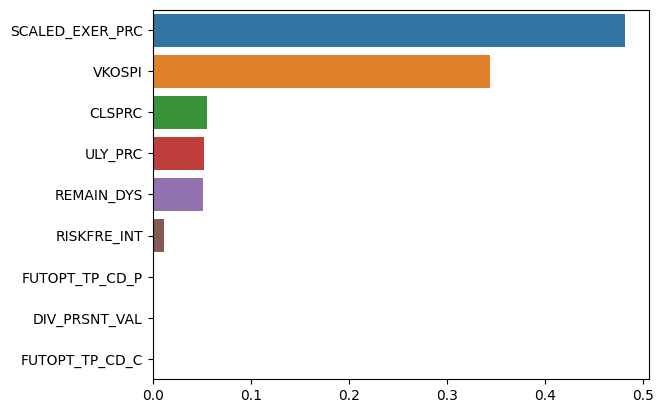

In [ ]:
feature_series = pd.Series(data = gbr.feature_importances_, index = X_features_ohe.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

## SVR, KNN

In [ ]:
# 9번 모델 SVR 모델

from sklearn.svm import SVR
svr= SVR(kernel = 'rbf', max_iter = 10000, C = 0.1, epsilon = 0.1)
svr.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(svr.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(svr.score(test_scaled,y_test)))


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도: 0.84
테스트 세트 정확도:0.84


In [ ]:

from sklearn.svm import SVR
svr= SVR(kernel = 'rbf', max_iter = 20000, C = 1, epsilon = 0.1)
svr.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(svr.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(svr.score(test_scaled,y_test)))


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도: 0.83
테스트 세트 정확도:0.83


In [ ]:
from sklearn.svm import SVR
svr= SVR(kernel = 'rbf', max_iter = 20000, C = 1, epsilon = 0.1)
svr.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(svr.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(svr.score(test_scaled,y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도: 0.83
테스트 세트 정확도:0.83


In [ ]:
# Grid Search for SVR
# to be edited

from sklearn.svm import SVR
grid_search = {'C': [ 1,  5, 10, 100],
               'epsilon':[0.1, 1, 2, 5]}

grid = GridSearchCV(estimator =SVR(max_iter = 20000), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring = 'r2', n_jobs = -1)

grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1, 'epsilon': 0.1}
SVR(C=1, max_iter=20000)
0.8262893914542868


In [ ]:
# 튜닝한 뒤 재실행(SVR)


from sklearn.svm import SVR
svr= SVR(kernel = 'rbf', max_iter = 20000, C = 1, epsilon = 0.1)
svr.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(svr.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(svr.score(test_scaled,y_test)))


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도: 0.83
테스트 세트 정확도:0.83


In [ ]:
#10번 모델 K-Nearest Neighbors 모델
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(weights = 'distance')
knn.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(knn.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(knn.score(test_scaled,y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도:0.96


In [ ]:
# Grid Search for KNN

grid_search = {'n_neighbors': [ 1, 3, 5, 10, 20]}

grid = GridSearchCV(estimator = KNeighborsRegressor(weights = 'distance'), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring = 'r2', n_jobs = -1)

grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
{'n_neighbors': 5}
KNeighborsRegressor(weights='distance')
0.9554719195955502


In [ ]:
# 튜닝한 뒤 재실행(KNN)
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor(weights = 'distance', n_neighbors= 5)
knn.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(knn.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(knn.score(test_scaled,y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도:0.96


##성능비교

In [ ]:
# 1번 Linear Regression 모델

from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(train_scaled, y_train)
pred = lr.predict(test_scaled)

print('Training accuracy : {:.3f}'.format(lr.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(lr.score(test_scaled, y_test)))


Training accuracy : 0.771
Test accuracy : 0.765


In [ ]:
# 2번 Ridge 모델

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(ridge.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(ridge.score(test_scaled, y_test)))

Training accuracy : 0.771
Test accuracy : 0.765


In [ ]:
# 3번 Lasso 모델
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(lasso.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(lasso.score(test_scaled, y_test)))

Training accuracy : 0.750
Test accuracy : 0.741


In [ ]:
# 4번 Decision Tree 모델

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 25, random_state=5)
dt.fit(train_scaled, y_train)

print('Training accuracy : {:.5f}'.format(dt.score(train_scaled, y_train)))
print('Test accuracy : {:.3f}'.format(dt.score(test_scaled, y_test)))

Training accuracy : 0.99980
Test accuracy : 0.933


In [ ]:
# 5번 Random Forest Model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,max_depth = 20, max_features = 6, n_jobs = -1,oob_score = True, random_state = 5)
forest.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(forest.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(forest.score(test_scaled, y_test)))

<ipython-input-19-ce312c9ceccc>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_scaled, y_train)


Training accuracy : 0.996
Test accuracy : 0.973


In [ ]:
# 6번 Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss= 'squared_error', max_depth = 10, n_estimators = 200, random_state = 0)
gbr.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(gbr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(gbr.score(test_scaled, y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.999
test Accuracy: 0.978


In [ ]:
# 7번 AdaBoost

from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(learning_rate = 0.1, n_estimators = 50,loss = 'square', random_state = 0)
abr.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(abr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(abr.score(test_scaled, y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.755
test Accuracy: 0.747


In [ ]:
# 9번 SVR


from sklearn.svm import SVR
svr= SVR(kernel = 'rbf', max_iter = 20000, C = 1, epsilon = 0.1)
svr.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(svr.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(svr.score(test_scaled,y_test)))


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도: 0.83
테스트 세트 정확도:0.83


In [ ]:
# 9번 KNN
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor(weights = 'distance', n_neighbors= 5)
knn.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(knn.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(knn.score(test_scaled,y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도:0.96


In [ ]:
acc_table = pd.DataFrame(columns = ['Algorithm','Train/Test', 'R_squared'])
acc_table.loc[0] = ['Linear Regression', 'Training',lr.score(train_scaled,y_train) ]
acc_table.loc[1] = ['Linear Regression', 'Test',lr.score(test_scaled, y_test) ]
acc_table.loc[2] = ['Ridge', 'Training',ridge.score(train_scaled,y_train) ]
acc_table.loc[3] = ['Ridge', 'Test',ridge.score(test_scaled, y_test) ]
acc_table.loc[4] = ['Lasso', 'Training',lasso.score(train_scaled,y_train) ]
acc_table.loc[5] = ['Lasso', 'Test',lasso.score(test_scaled, y_test) ]
acc_table.loc[6] = ['Decision Tree', 'Training',dt.score(train_scaled,y_train) ]
acc_table.loc[7] = ['Decision Tree', 'Test',dt.score(test_scaled, y_test) ]
acc_table.loc[8] = ['Random Forest', 'Training',forest.score(train_scaled,y_train) ]
acc_table.loc[9] = ['Random Forest', 'Test',forest.score(test_scaled, y_test) ]
acc_table.loc[10] = ['GBM', 'Training',gbr.score(train_scaled,y_train) ]
acc_table.loc[11] = ['GBM', 'Test',gbr.score(test_scaled, y_test) ]
acc_table.loc[12] = ['AdaBoost', 'Training',abr.score(train_scaled,y_train) ]
acc_table.loc[13] = ['AdaBoost', 'Test',abr.score(test_scaled, y_test) ]
#acc_table.loc[14] = ['Bagging', 'Training Accuracy',bagging.score(train_scaled,y_train) ]
#acc_table.loc[15] = ['Bagging', 'Test Accuracy',bagging.score(test_scaled, y_test) ]
acc_table.loc[14] = ['SVR', 'Training', svr.score(train_scaled,y_train) ]
acc_table.loc[15] = ['SVR', 'Test', svr.score(test_scaled, y_test) ]
acc_table.loc[16] = ['KNN', 'Training', knn.score(train_scaled,y_train) ]
acc_table.loc[17] = ['KNN', 'Test', knn.score(test_scaled, y_test) ]


acc_table

,Algorithm,Train/Test,R_squared
0,Linear Regression,Training,0.771332
1,Linear Regression,Test,0.764523
2,Ridge,Training,0.771332
3,Ridge,Test,0.764518
4,Lasso,Training,0.750293
5,Lasso,Test,0.741166
6,Decision Tree,Training,0.999805
7,Decision Tree,Test,0.933393
8,Random Forest,Training,0.996085
9,Random Forest,Test,0.973305


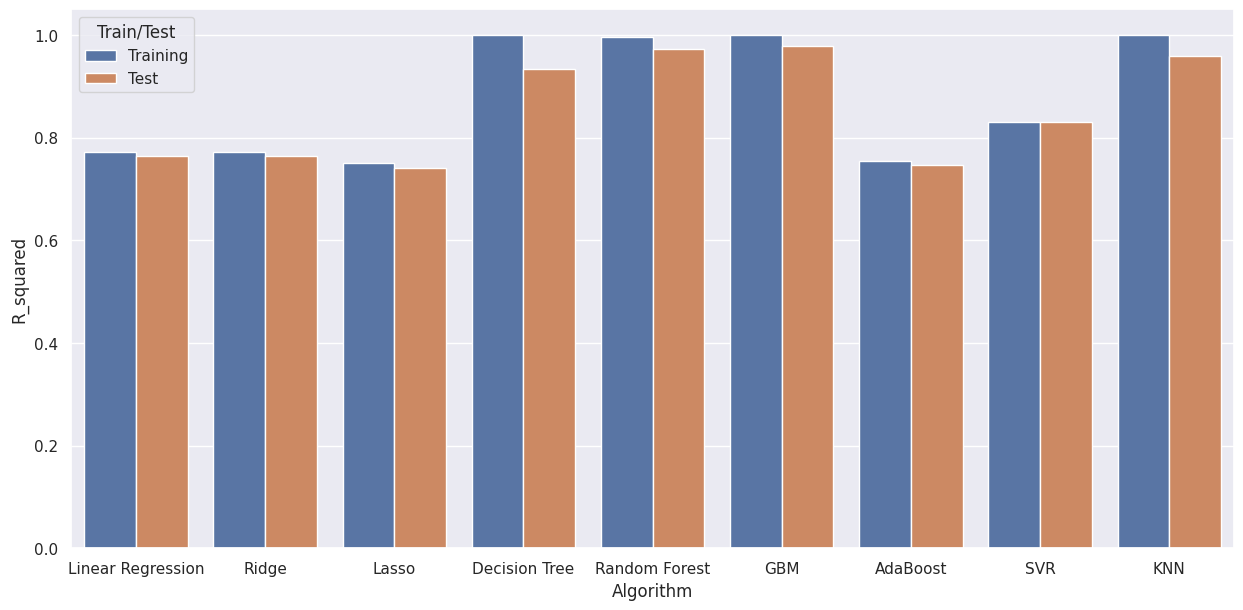

In [ ]:
sns.set(rc = {'figure.figsize':(15,7)})
ax = sns.barplot(data = acc_table, x = 'Algorithm', y = 'R_squared', hue = 'Train/Test')

In [ ]:
acc_table2 = pd.pivot_table(acc_table, index = ['Train/Test'], columns = ['Algorithm'], values = [ 'R_squared'])
acc_table2

R_squared                                              \
Algorithm   AdaBoost Decision Tree       GBM       KNN     Lasso   
Train/Test                                                         
Test        0.746794      0.933393  0.978034  0.958343  0.741166   
Training    0.755324      0.999805  0.999259  1.000000  0.750293   

                                                                
Algorithm  Linear Regression Random Forest     Ridge       SVR  
Train/Test                                                      
Test                0.764523      0.973305  0.764518  0.830789  
Training            0.771332      0.996085  0.771332  0.831231

** DNN 추가

In [ ]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.cpu().detach(), y_pred.cpu().detach())
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.cpu().detach(), y_pred2.cpu().detach())

print(f'learning_rate: {learning_rate}')
print(f'weight_decay: {weight_decay}')
print(f'num_epochs: {num_epochs}')
print(f'training_r2_score: {train_score}')
print(f'test_r2_score: {test_score}')
print(model)

learning_rate: 0.0001
weight_decay: 0.0001
num_epochs: 5000
training_r2_score: 0.9798406801542473
test_r2_score: 0.9724314432874106
Large10NN(
  (linear1): Linear(in_features=9, out_features=64, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=64, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=64, bias=True)
  (linear5): Linear(in_features=64, out_features=64, bias=True)
  (linear6): Linear(in_features=64, out_features=64, bias=True)
  (linear7): Linear(in_features=64, out_features=64, bias=True)
  (linear8): Linear(in_features=64, out_features=64, bias=True)
  (linear9): Linear(in_features=64, out_features=64, bias=True)
  (linear10): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
acc_table.loc[18] = ['DNN', 'Training', train_score ]
acc_table.loc[19] = ['DNN', 'Test', test_score ]


acc_table

,Algorithm,Train/Test,R_squared
0,Linear Regression,Training,0.771332
1,Linear Regression,Test,0.764523
2,Ridge,Training,0.771332
3,Ridge,Test,0.764518
4,Lasso,Training,0.750293
5,Lasso,Test,0.741166
6,Decision Tree,Training,0.999805
7,Decision Tree,Test,0.933393
8,Random Forest,Training,0.996085
9,Random Forest,Test,0.973305


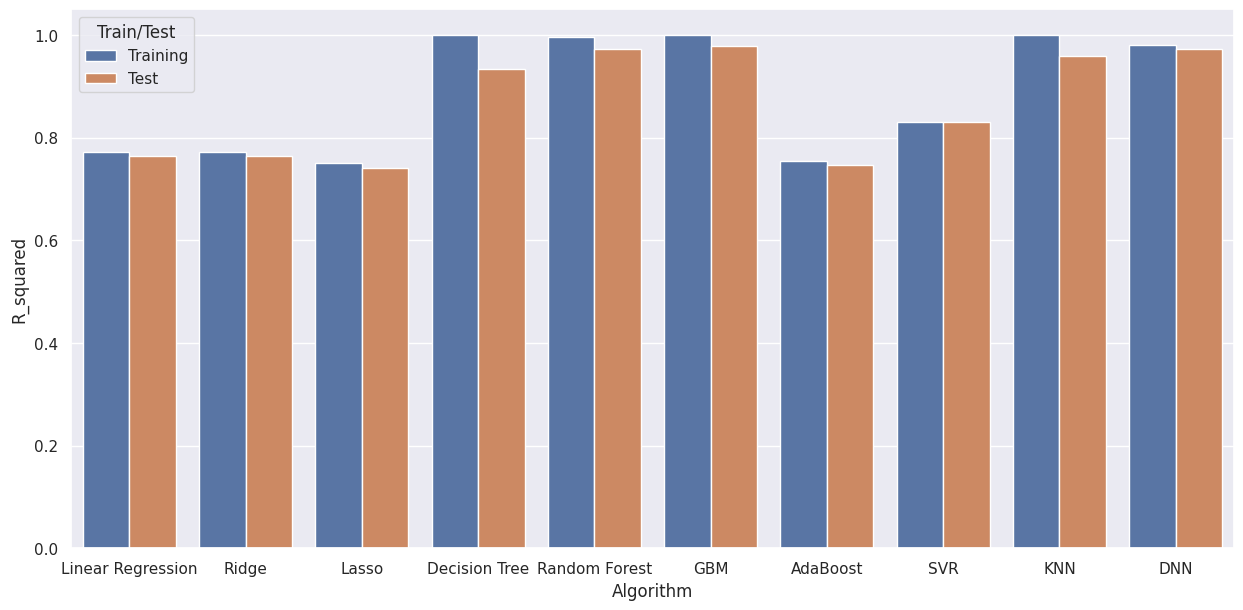

In [ ]:
sns.set(rc = {'figure.figsize':(15,7)})
ax = sns.barplot(data = acc_table, x = 'Algorithm', y = 'R_squared', hue = 'Train/Test')

In [ ]:
acc_table2 = pd.pivot_table(acc_table, index = ['Train/Test'], columns = ['Algorithm'], values = [ 'R_squared'])
acc_table2

R_squared                                                        \
Algorithm   AdaBoost       DNN Decision Tree       GBM       KNN     Lasso   
Train/Test                                                                   
Test        0.746794  0.972431      0.933393  0.978034  0.958343  0.741166   
Training    0.755324  0.979841      0.999805  0.999259  1.000000  0.750293   

                                                                
Algorithm  Linear Regression Random Forest     Ridge       SVR  
Train/Test                                                      
Test                0.764523      0.973305  0.764518  0.830789  
Training            0.771332      0.996085  0.771332  0.831231

## PCA


In [ ]:
# PCA

from sklearn.decomposition import PCA

pca = PCA()
ss.fit(X_features_ohe)
X_scaled = ss.transform(X_features_ohe)

pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)
df_pca = pd.DataFrame(pca_data)
df_pca.columns = ['PC'+ str(i) for i in range(1,10)]
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.436696,-0.673416,3.654752,3.093123,3.284432,-0.659482,1.036261,-0.171266,-1.736325e-16
1,0.467310,-0.713704,3.541771,2.865997,2.979109,-0.608871,1.066116,-0.159443,-1.736325e-16
2,0.471572,-0.552815,3.563906,2.925306,2.977594,-0.609215,1.072747,0.000014,-1.736325e-16
3,0.544156,0.077991,3.467736,2.723706,2.396791,-0.477114,1.130396,0.319611,-6.261015e-17
4,0.502962,-0.928085,2.954006,1.653405,1.362111,-0.562070,1.222838,-0.105829,-1.736325e-16
...,...,...,...,...,...,...,...,...,...
167844,-0.488737,-0.204609,-1.740281,-1.545128,1.218467,0.515993,0.154316,0.058511,1.563584e-16
167845,-0.463827,-0.200301,-1.731173,-1.519951,1.249416,0.559863,0.151598,0.059306,1.563584e-16
167846,-0.436208,-0.192725,-1.713446,-1.476183,1.304821,0.608708,0.146545,0.059521,1.563584e-16
167847,-0.404643,-0.180389,-1.683170,-1.405346,1.395839,0.664797,0.138093,0.058891,1.563584e-16


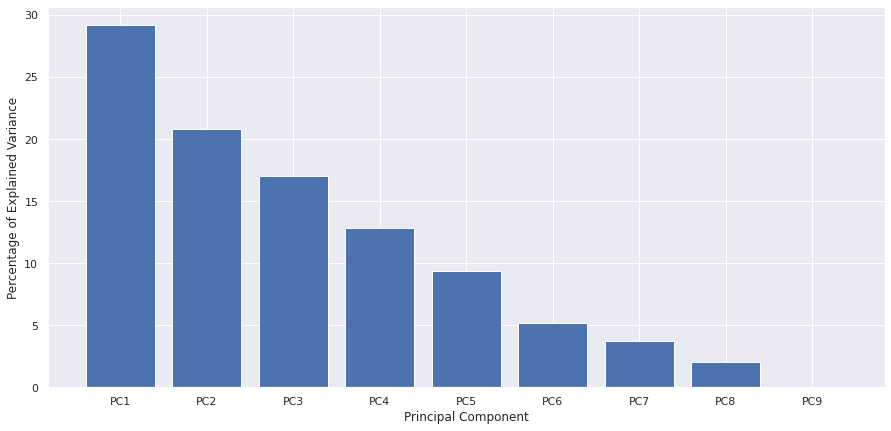

In [ ]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

In [ ]:
# train, test set 분리

from sklearn.model_selection import train_test_split

X_pca_train, X_pca_test, y_pca_train, y_pca_test =  train_test_split(df_pca[['PC1', 'PC2', 'PC3']], y, test_size=0.3, random_state=5)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117494, 9), (50355, 9), (117494, 1), (50355, 1))

In [ ]:
X_pca_train.shape, X_pca_test.shape, y_pca_train.shape, y_pca_test.shape

((117494, 3), (50355, 3), (117494, 1), (50355, 1))

In [ ]:
forest = RandomForestRegressor(n_estimators = 100,max_depth = 20,max_features = 3, n_jobs = -1,oob_score = True, random_state = 5)
gbr = GradientBoostingRegressor(loss= 'squared_error', max_depth = 10, max_features = 3, random_state = 0)


In [ ]:
lr.fit(X_pca_train, y_pca_train)
ridge.fit(X_pca_train, y_pca_train)
lasso.fit(X_pca_train, y_pca_train)
dt.fit(X_pca_train, y_pca_train)
forest.fit(X_pca_train, y_pca_train)
gbr.fit(X_pca_train, y_pca_train)
abr.fit(X_pca_train, y_pca_train)
#bagging.fit(X_pca_train, y_pca_train)
#svr.fit(X_pca_train, y_pca_train)
knn.fit(X_pca_train, y_pca_train)

<ipython-input-46-4e270fda1ea1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_pca_train, y_pca_train)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsRegressor(weights='distance')

In [ ]:
PCA_acc_table = pd.DataFrame(columns = ['Algorithm','Train/Test', 'R_squared'])
PCA_acc_table.loc[0] = ['Linear Regression', 'Training',lr.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[1] = ['Linear Regression', 'Test',lr.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[2] = ['Ridge', 'Training',ridge.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[3] = ['Ridge', 'Test',ridge.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[4] = ['Lasso', 'Training',lasso.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[5] = ['Lasso', 'Test',lasso.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[6] = ['Decision Tree', 'Training',dt.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[7] = ['Decision Tree', 'Test',dt.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[8] = ['Random Forest', 'Training',forest.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[9] = ['Random Forest', 'Test',forest.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[10] = ['GBR', 'Training',gbr.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[11] = ['GBR', 'Test',gbr.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[12] = ['AdaBoost', 'Training',abr.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[13] = ['AdaBoost', 'Test',abr.score(X_pca_test, y_pca_test) ]
#PCA_acc_table.loc[14] = ['Bagging', 'Training Accuracy',bagging.score(X_pca_train, y_pca_train) ]
#PCA_acc_table.loc[15] = ['Bagging', 'Test Accuracy',bagging.score(X_pca_test, y_pca_test) ]
#PCA_acc_table.loc[16] = ['SVR', 'Training Accuracy',svr.score(X_pca_train, y_pca_train) ]
#PCA_acc_table.loc[17] = ['SVR', 'Test Accuracy',svr.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[14] = ['KNN', 'Training',knn.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[15] = ['KNN', 'Test',knn.score(X_pca_test, y_pca_test) ]
PCA_acc_table

,Algorithm,Train/Test,R_squared
0,Linear Regression,Training,0.172089
1,Linear Regression,Test,0.173283
2,Ridge,Training,0.172089
3,Ridge,Test,0.173283
4,Lasso,Training,0.168380
5,Lasso,Test,0.168764
6,Decision Tree,Training,0.968946
7,Decision Tree,Test,0.888637
8,Random Forest,Training,0.968533
9,Random Forest,Test,0.917513


In [ ]:
PCA_acc_table2 = pd.pivot_table(PCA_acc_table, index = ['Train/Test'], columns = ['Algorithm'], values = [ 'R_squared'])
PCA_acc_table2

R_squared                                              \
Algorithm   AdaBoost Decision Tree       GBR       KNN     Lasso   
Train/Test                                                         
Test        0.332842      0.888637  0.891028  0.935497  0.168764   
Training    0.331426      0.968946  0.932335  1.000000  0.168380   

                                                      
Algorithm  Linear Regression Random Forest     Ridge  
Train/Test                                            
Test                0.173283      0.917513  0.173283  
Training            0.172089      0.968533  0.172089

In [ ]:
acc_table2

R_squared                                                        \
Algorithm   AdaBoost       DNN Decision Tree       GBM       KNN     Lasso   
Train/Test                                                                   
Test        0.563590  0.941526      0.955101  0.971537  0.956136  0.395246   
Training    0.554932  0.946308      0.997034  0.995089  1.000000  0.398682   

                                                      
Algorithm  Linear Regression Random Forest     Ridge  
Train/Test                                            
Test                0.409878      0.969079  0.409877  
Training            0.412282      0.993095  0.412282

## *정규화 안하고 돌려보기


In [ ]:
# 1. Linear Regression
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# Ridge
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(X_train, y_train)

# Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 20, random_state=5)
dt.fit(X_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,max_depth = 20, max_features = 6, n_jobs = -1,oob_score = True, random_state = 5)
forest.fit(X_train, y_train)

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss= 'squared_error', max_depth = 10, n_estimators = 200, random_state = 0)
gbr.fit(X_train, y_train)

# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(learning_rate = 0.1, n_estimators = 10,loss = 'square', random_state = 0)
abr.fit(X_train, y_train)

# Bagging
#from sklearn.ensemble import BaggingRegressor

#bagging = BaggingRegressor(DecisionTreeRegressor(), n_estimators =100, max_features = 9, max_samples = 10, oob_score = True, n_jobs = -1, random_state = 0 )
#bagging.fit(X_train, y_train)

#SVR
#from sklearn.svm import SVR
#svr= SVR(kernel = 'rbf', max_iter = 10000, C = 5, epsilon = 0.1)
#svr.fit(X_train, y_train)

# KNN
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor(weights = 'distance', n_neighbors= 5)
knn.fit(X_train, y_train)


<ipython-input-50-d039bfe83c6a>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsRegressor(weights='distance')

In [ ]:
acc_table_no_std = pd.DataFrame(columns = ['Algorithm','Train/Test', 'R_squared'])
acc_table_no_std.loc[0] = ['Linear Regression', 'Training',lr.score(X_train, y_train) ]
acc_table_no_std.loc[1] = ['Linear Regression', 'Test',lr.score(X_test, y_test) ]
acc_table_no_std.loc[2] = ['Ridge', 'Training',ridge.score(X_train, y_train) ]
acc_table_no_std.loc[3] = ['Ridge', 'Test',ridge.score(X_test, y_test) ]
acc_table_no_std.loc[4] = ['Lasso', 'Training',lasso.score(X_train, y_train) ]
acc_table_no_std.loc[5] = ['Lasso', 'Test',lasso.score(X_test, y_test) ]
acc_table_no_std.loc[6] = ['Decision Tree', 'Training',dt.score(X_train, y_train) ]
acc_table_no_std.loc[7] = ['Decision Tree', 'Test',dt.score(X_test, y_test) ]
acc_table_no_std.loc[8] = ['Random Forest', 'Training',forest.score(X_train, y_train) ]
acc_table_no_std.loc[9] = ['Random Forest', 'Test',forest.score(X_test, y_test) ]
acc_table_no_std.loc[10] = ['GBM', 'Training',gbr.score(X_train, y_train) ]
acc_table_no_std.loc[11] = ['GBM', 'Test',gbr.score(X_test, y_test) ]
acc_table_no_std.loc[12] = ['AdaBoost', 'Training',abr.score(X_train, y_train) ]
acc_table_no_std.loc[13] = ['AdaBoost', 'Test',abr.score(X_test, y_test) ]
#acc_table_no_std.loc[14] = ['Bagging', 'Training Accuracy',bagging.score(X_train, y_train) ]
#acc_table_no_std.loc[15] = ['Bagging', 'Test Accuracy',bagging.score(X_test, y_test) ]
#acc_table_no_std.loc[16] = ['SVR', 'Training Accuracy', svr.score(X_train, y_train) ]
#acc_table_no_std.loc[17] = ['SVR', 'Test Accuracy', svr.score(X_test, y_test) ]
acc_table_no_std.loc[14] = ['KNN', 'Training', knn.score(X_train, y_train) ]
acc_table_no_std.loc[15] = ['KNN', 'Test', knn.score(X_test, y_test) ]


acc_table_no_std

,Algorithm,Train/Test,R_squared
0,Linear Regression,Training,0.412282
1,Linear Regression,Test,0.409878
2,Ridge,Training,0.411564
3,Ridge,Test,0.409318
4,Lasso,Training,0.408653
5,Lasso,Test,0.406482
6,Decision Tree,Training,0.997034
7,Decision Tree,Test,0.954573
8,Random Forest,Training,0.993070
9,Random Forest,Test,0.969012


In [ ]:
acc_table_no_std2 = pd.pivot_table(acc_table_no_std, index = ['Train/Test'], columns = ['Algorithm'], values = [ 'R_squared'])
acc_table_no_std2

R_squared                                              \
Algorithm   AdaBoost Decision Tree       GBM       KNN     Lasso   
Train/Test                                                         
Test        0.563590      0.954573  0.971503  0.967094  0.406482   
Training    0.554932      0.997034  0.995089  1.000000  0.408653   

                                                      
Algorithm  Linear Regression Random Forest     Ridge  
Train/Test                                            
Test                0.409878      0.969012  0.409318  
Training            0.412282      0.993070  0.411564

## Pytorch를 이용한 딥러닝 학습

In [ ]:
import torch
import torch.nn as nn

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
import random
random.seed(100)
torch.manual_seed(100)
if device == 'cuda':
    torch.cuda.manual_seed_all(100)

In [ ]:
train_scaled_tensor = torch.from_numpy(train_scaled)
test_scaled_tensor = torch.from_numpy(test_scaled)
y_train_tensor = torch.from_numpy(y_train.values)
y_test_tensor = torch.from_numpy(y_test.values)


In [ ]:
train_scaled_tensor = torch.tensor(train_scaled_tensor, dtype = torch.float32)
test_scaled_tensor = torch.tensor(test_scaled_tensor, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train_tensor, dtype = torch.float32)
y_test_tensor =  torch.tensor(y_test_tensor, dtype = torch.float32)


<ipython-input-34-08aea4418fc3>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_scaled_tensor = torch.tensor(train_scaled_tensor, dtype = torch.float32)
<ipython-input-34-08aea4418fc3>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_scaled_tensor = torch.tensor(test_scaled_tensor, dtype = torch.float32)
<ipython-input-34-08aea4418fc3>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train_tensor, dtype = torch.float32)
<ipython-input-34-08aea4418fc3>:4: UserWarning: To copy construct from a ten

In [ ]:
train_scaled_tensor = train_scaled_tensor.to(device)
test_scaled_tensor = test_scaled_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
y_test_tensor =  y_test_tensor.to(device)


In [ ]:
class Large10NN(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(9,64)
    self.activation = nn.ReLU()
    self.linear2 = nn.Linear(64,64)
    self.linear3 = nn.Linear(64,64)
    self.linear4 = nn.Linear(64,64)
    self.linear5 = nn.Linear(64,64)
    self.linear6 = nn.Linear(64,64)
    self.linear7 = nn.Linear(64,64)
    self.linear8 = nn.Linear(64,64)
    self.linear9 = nn.Linear(64,64)
    self.linear10 = nn.Linear(64,1)



  def forward(self,x):
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    x = self.activation(x)
    x = self.linear3(x)
    x = self.activation(x)
    x = self.linear4(x)
    x = self.activation(x)
    x = self.linear5(x)
    x = self.activation(x)
    x = self.linear6(x)
    x = self.activation(x)
    x = self.linear7(x)
    x = self.activation(x)
    x = self.linear8(x)
    x = self.activation(x)
    x = self.linear9(x)
    x = self.activation(x)
    x = self.linear10(x)
    return x
  

In [ ]:
model = Large10NN().to(device)

learning_rate = 0.0001
weight_decay = 0.0001

loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = weight_decay)

In [ ]:

num_epochs = 5000

training_loss, test_loss = [], []

for epoch in range(num_epochs):
  y_pred = model(train_scaled_tensor)
  loss= loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss_test = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss_test.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.4f} ')

Epoch 25/5000, Loss=0.0433 
Epoch 50/5000, Loss=0.0333 
Epoch 75/5000, Loss=0.0253 
Epoch 100/5000, Loss=0.0193 
Epoch 125/5000, Loss=0.0157 
Epoch 150/5000, Loss=0.0134 
Epoch 175/5000, Loss=0.0099 
Epoch 200/5000, Loss=0.0058 
Epoch 225/5000, Loss=0.0033 
Epoch 250/5000, Loss=0.0027 
Epoch 275/5000, Loss=0.0024 
Epoch 300/5000, Loss=0.0022 
Epoch 325/5000, Loss=0.0021 
Epoch 350/5000, Loss=0.0020 
Epoch 375/5000, Loss=0.0019 
Epoch 400/5000, Loss=0.0019 
Epoch 425/5000, Loss=0.0018 
Epoch 450/5000, Loss=0.0018 
Epoch 475/5000, Loss=0.0017 
Epoch 500/5000, Loss=0.0017 
Epoch 525/5000, Loss=0.0016 
Epoch 550/5000, Loss=0.0016 
Epoch 575/5000, Loss=0.0016 
Epoch 600/5000, Loss=0.0015 
Epoch 625/5000, Loss=0.0015 
Epoch 650/5000, Loss=0.0014 
Epoch 675/5000, Loss=0.0014 
Epoch 700/5000, Loss=0.0013 
Epoch 725/5000, Loss=0.0013 
Epoch 750/5000, Loss=0.0012 
Epoch 775/5000, Loss=0.0012 
Epoch 800/5000, Loss=0.0011 
Epoch 825/5000, Loss=0.0011 
Epoch 850/5000, Loss=0.0011 
Epoch 875/5000, L

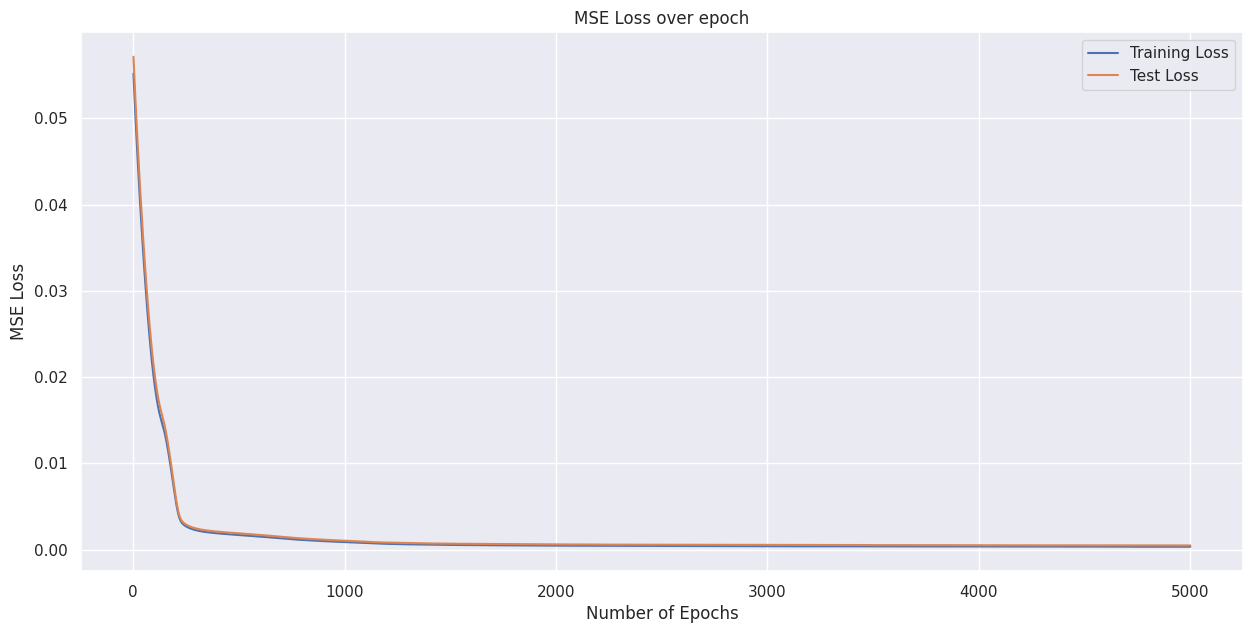

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,num_epochs,num_epochs)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
# 64nodes Model 

from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.cpu().detach(), y_pred.cpu().detach())
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.cpu().detach(), y_pred2.cpu().detach())

print(f'learning_rate: {learning_rate}')
print(f'weight_decay: {weight_decay}')
print(f'num_epochs: {num_epochs}')
print(f'training_r2_score: {train_score}')
print(f'test_r2_score: {test_score}')
print(model)

learning_rate: 0.0001
weight_decay: 0.0001
num_epochs: 5000
training_r2_score: 0.9777754304001227
test_r2_score: 0.9707260449773064
Large10NN(
  (linear1): Linear(in_features=9, out_features=64, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=64, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=64, bias=True)
  (linear5): Linear(in_features=64, out_features=64, bias=True)
  (linear6): Linear(in_features=64, out_features=64, bias=True)
  (linear7): Linear(in_features=64, out_features=64, bias=True)
  (linear8): Linear(in_features=64, out_features=64, bias=True)
  (linear9): Linear(in_features=64, out_features=64, bias=True)
  (linear10): Linear(in_features=64, out_features=1, bias=True)
)


** 위에 결과로 쓰기!

In [ ]:
# 128nodes Model 
num_epochs = 2000

from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.cpu().detach(), y_pred.cpu().detach())
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.cpu().detach(), y_pred2.cpu().detach())

print(f'learning_rate: {learning_rate}')
print(f'weight_decay: {weight_decay}')
print(f'num_epochs: {num_epochs}')
print(f'training_r2_score: {train_score}')
print(f'test_r2_score: {test_score}')
print(model)

learning_rate: 0.001
weight_decay: 0.001
num_epochs: 2000
training_r2_score: 0.9296932762833704
test_r2_score: 0.9219867795570643
Large128NN_BN(
  (linear1): Linear(in_features=9, out_features=128, bias=True)
  (activation): ReLU()
  (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=128, bias=True)
  (linear5): Linear(in_features=128, out_features=128, bias=True)
  (linear6): Linear(in_features=128, out_features=128, bias=True)
  (linear7): Linear(in_features=128, out_features=128, bias=True)
  (linear8): Linear(in_features=128, out_features=128, bias=True)
  (linear9): Linear(in_features=128, out_features=128, bias=True)
  (linear10): Linear(in_features=128, out_features=1, bias=True)
)


## 요걸로 채택

In [ ]:
num_epochs = 2000

training_loss, test_loss = [], []

for epoch in range(num_epochs):
  y_pred = model(train_scaled_tensor)
  loss= loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss_test = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss_test.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.4f} ')

Epoch 25/2000, Loss=0.0014 
Epoch 50/2000, Loss=0.0016 
Epoch 75/2000, Loss=0.0014 
Epoch 100/2000, Loss=0.0014 
Epoch 125/2000, Loss=0.0014 
Epoch 150/2000, Loss=0.0018 
Epoch 175/2000, Loss=0.0013 
Epoch 200/2000, Loss=0.0013 
Epoch 225/2000, Loss=0.0015 
Epoch 250/2000, Loss=0.0012 
Epoch 275/2000, Loss=0.0014 
Epoch 300/2000, Loss=0.0014 
Epoch 325/2000, Loss=0.0012 
Epoch 350/2000, Loss=0.0011 
Epoch 375/2000, Loss=0.0011 
Epoch 400/2000, Loss=0.0015 
Epoch 425/2000, Loss=0.0015 
Epoch 450/2000, Loss=0.0010 
Epoch 475/2000, Loss=0.0016 
Epoch 500/2000, Loss=0.0012 
Epoch 525/2000, Loss=0.0011 
Epoch 550/2000, Loss=0.0014 
Epoch 575/2000, Loss=0.0011 
Epoch 600/2000, Loss=0.0014 
Epoch 625/2000, Loss=0.0012 
Epoch 650/2000, Loss=0.0019 
Epoch 675/2000, Loss=0.0014 
Epoch 700/2000, Loss=0.0010 
Epoch 725/2000, Loss=0.0016 
Epoch 750/2000, Loss=0.0024 
Epoch 775/2000, Loss=0.0015 
Epoch 800/2000, Loss=0.0021 
Epoch 825/2000, Loss=0.0018 
Epoch 850/2000, Loss=0.0014 
Epoch 875/2000, L

In [ ]:
# 128nodes Model 

from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.cpu().detach(), y_pred.cpu().detach())
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.cpu().detach(), y_pred2.cpu().detach())

print(f'learning_rate: {learning_rate}')
print(f'weight_decay: {weight_decay}')
print(f'num_epochs: {num_epochs}')
print(f'training_r2_score: {train_score}')
print(f'test_r2_score: {test_score}')
print(model)

NameError: ignored

In [ ]:
torch.save(model, '/content/gdrive/MyDrive/Colab Notebooks/Programming for AI/model.pth')

In [ ]:
model = torch.load('/content/gdrive/MyDrive/Colab Notebooks/Programming for AI/model.pth')

In [ ]:
# 64nodes
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.cpu().detach(), y_pred.cpu().detach())
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.cpu().detach(), y_pred2.cpu().detach())

print(f'learning_rate: {learning_rate}')
print(f'weight_decay: {weight_decay}')
print(f'num_epochs: {num_epochs}')
print(f'training_r2_score: {train_score}')
print(f'test_r2_score: {test_score}')
print(model)

learning_rate: 0.01
weight_decay: 0.001
num_epochs: 10000
training_r2_score: 0.8801798026426271
test_r2_score: 0.8903321926760964
Large64NN_BN(
  (linear1): Linear(in_features=9, out_features=64, bias=True)
  (activation): ReLU()
  (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=64, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=64, bias=True)
  (linear5): Linear(in_features=64, out_features=64, bias=True)
  (linear6): Linear(in_features=64, out_features=64, bias=True)
  (linear7): Linear(in_features=64, out_features=64, bias=True)
  (linear8): Linear(in_features=64, out_features=64, bias=True)
  (linear9): Linear(in_features=64, out_features=64, bias=True)
  (linear10): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
# large, 0.01, 2000epochs
training_r2_score: 0.8952423908491325
test_r2_score: 0.9202448952129847

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(5000):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/5000, Loss={loss.item():.4f} ')

Epoch 25/5000, Loss=0.0442 
Epoch 50/5000, Loss=0.0213 
Epoch 75/5000, Loss=0.0179 
Epoch 100/5000, Loss=0.0152 
Epoch 125/5000, Loss=0.0292 
Epoch 150/5000, Loss=0.0115 
Epoch 175/5000, Loss=0.0099 
Epoch 200/5000, Loss=0.0125 
Epoch 225/5000, Loss=0.0085 
Epoch 250/5000, Loss=0.0326 
Epoch 275/5000, Loss=0.0183 
Epoch 300/5000, Loss=0.0126 
Epoch 325/5000, Loss=0.0189 
Epoch 350/5000, Loss=0.0090 
Epoch 375/5000, Loss=0.0070 
Epoch 400/5000, Loss=0.0061 
Epoch 425/5000, Loss=0.0206 
Epoch 450/5000, Loss=0.0136 
Epoch 475/5000, Loss=0.0237 
Epoch 500/5000, Loss=0.0120 
Epoch 525/5000, Loss=0.0090 
Epoch 550/5000, Loss=0.0163 
Epoch 575/5000, Loss=0.0082 
Epoch 600/5000, Loss=0.0067 
Epoch 625/5000, Loss=0.0060 
Epoch 650/5000, Loss=0.0180 
Epoch 675/5000, Loss=0.0069 
Epoch 700/5000, Loss=0.0055 
Epoch 725/5000, Loss=0.0064 
Epoch 750/5000, Loss=0.0070 
Epoch 775/5000, Loss=0.0204 
Epoch 800/5000, Loss=0.0082 
Epoch 825/5000, Loss=0.0057 
Epoch 850/5000, Loss=0.0052 
Epoch 875/5000, L

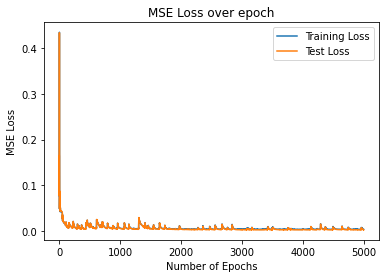

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,5000,5000)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

training_r2_score: 0.9051497254246123
test_r2_score: 0.9310921657016993


In [ ]:
#large10, 0.01, 5000 epochs
training_r2_score: 0.9051497254246123
test_r2_score: 0.9310921657016993

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(10000):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/10000, Loss={loss.item():.4f} ')

Epoch 25/10000, Loss=0.0029 
Epoch 50/10000, Loss=0.0025 
Epoch 75/10000, Loss=0.0024 
Epoch 100/10000, Loss=0.0024 
Epoch 125/10000, Loss=0.0024 
Epoch 150/10000, Loss=0.0024 
Epoch 175/10000, Loss=0.0025 
Epoch 200/10000, Loss=0.0024 
Epoch 225/10000, Loss=0.0024 
Epoch 250/10000, Loss=0.0024 
Epoch 275/10000, Loss=0.0033 
Epoch 300/10000, Loss=0.0034 
Epoch 325/10000, Loss=0.0028 
Epoch 350/10000, Loss=0.0026 
Epoch 375/10000, Loss=0.0024 
Epoch 400/10000, Loss=0.0023 
Epoch 425/10000, Loss=0.0023 
Epoch 450/10000, Loss=0.0023 
Epoch 475/10000, Loss=0.0023 
Epoch 500/10000, Loss=0.0023 
Epoch 525/10000, Loss=0.0024 
Epoch 550/10000, Loss=0.0023 
Epoch 575/10000, Loss=0.0023 
Epoch 600/10000, Loss=0.0024 
Epoch 625/10000, Loss=0.0023 
Epoch 650/10000, Loss=0.0023 
Epoch 675/10000, Loss=0.0023 
Epoch 700/10000, Loss=0.0024 
Epoch 725/10000, Loss=0.0031 
Epoch 750/10000, Loss=0.0025 
Epoch 775/10000, Loss=0.0024 
Epoch 800/10000, Loss=0.0024 
Epoch 825/10000, Loss=0.0023 
Epoch 850/100

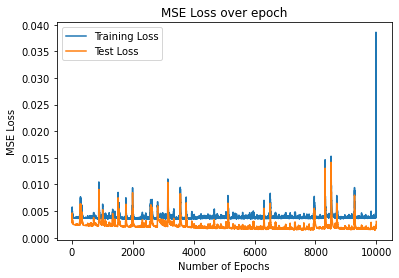

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,10000,10000)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

training_r2_score: 0.873874836556653
test_r2_score: 0.9307468999046292


### learning rate = 0.1, 1000 epochs, 10 hidden layers



In [ ]:
model = MyNN()

learning_rate = 0.1
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(1000):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/100, Loss={loss.item():.4f} ')

Epoch 25/100, Loss=2.2567 
Epoch 50/100, Loss=0.3829 
Epoch 75/100, Loss=0.0473 
Epoch 100/100, Loss=0.0428 
Epoch 125/100, Loss=0.0427 
Epoch 150/100, Loss=0.0425 
Epoch 175/100, Loss=0.0423 
Epoch 200/100, Loss=0.0421 
Epoch 225/100, Loss=0.0419 
Epoch 250/100, Loss=0.0418 
Epoch 275/100, Loss=0.0416 
Epoch 300/100, Loss=0.0414 
Epoch 325/100, Loss=0.0412 
Epoch 350/100, Loss=0.0410 
Epoch 375/100, Loss=0.0409 


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,200,200)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

### learning rate= 0.1, 1000 epochs, 5 hidden layers



In [ ]:
class SmallNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(9,100)
    self.activation = nn.Sigmoid()
    self.linear2 = nn.Linear(100,100)
    self.linear3 = nn.Linear(100, 100)
    self.linear4 = nn.Linear(100,100)
    self.linear5 = nn.Linear(100,1)



  def forward(self,x):
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    x = self.activation(x)
    x = self.linear3(x)
    x = self.activation(x)
    x = self.linear4(x)
    x = self.activation(x)
    x = self.linear5(x)
    return x
  

In [ ]:
model = SmallNN()

learning_rate = 0.1
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(200):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/100, Loss={loss.item():.4f} ')

Epoch 25/100, Loss=0.1817 
Epoch 50/100, Loss=0.0457 
Epoch 75/100, Loss=0.0434 
Epoch 100/100, Loss=0.0433 
Epoch 125/100, Loss=0.0432 
Epoch 150/100, Loss=0.0432 
Epoch 175/100, Loss=0.0432 
Epoch 200/100, Loss=0.0432 


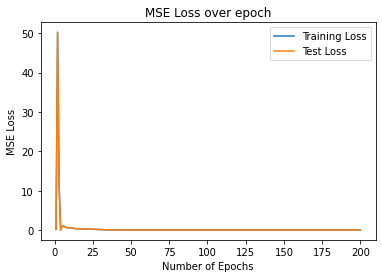

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,200,200)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

training_r2_score: -4.954959525260705e-05
test_r2_score: -2.77364364809074e-08


### learning rate= 0.01, 1000 epochs, 5 hidden layers

In [ ]:
model = SmallNN()

learning_rate = 0.01
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(1000):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/100, Loss={loss.item():.4f} ')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,1000,1000)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

### Smaller NN with 3 hidden layers

In [ ]:
class SmallerNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(9,300)
    self.activation = nn.Sigmoid()
    self.linear2 = nn.Linear(300,300)
    self.linear3 = nn.Linear(300, 1)



  def forward(self,x):
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    x = self.activation(x)
    x = self.linear3(x)
    return x
  

In [ ]:
model = SmallerNN()

learning_rate = 0.05
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(1000):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/1000, Loss={loss.item():.4f} ')

Epoch 25/1000, Loss=2.4851 
Epoch 50/1000, Loss=0.1192 
Epoch 75/1000, Loss=0.0443 
Epoch 100/1000, Loss=0.0367 
Epoch 125/1000, Loss=0.0298 
Epoch 150/1000, Loss=0.0257 
Epoch 175/1000, Loss=0.0226 
Epoch 200/1000, Loss=0.0205 
Epoch 225/1000, Loss=0.0191 
Epoch 250/1000, Loss=0.0179 


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,1000,1000)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

* 
CNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
num_epochs = 1000
batch_size = 4
learning_rate = 0.001

In [ ]:
train_scaled_tensor = train_scaled_tensor.to(device)
test_scaled_tensor = test_scaled_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
y_test_tensor =  y_test_tensor.to(device)

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    # Flatten 3d tensor to 1d tensor
    self.fc1 = nn.Linear(400, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 1)

  def forward(self, x):
    # conv + relu + pooling
    out = self.pool(F.relu(self.conv1(x)))
    out = self.pool(F.relu(self.conv2(out)))
    # Flatten it before fc1
    out = out.reshape(-1, 400)
    out = F.relu(self.fc1(out))
    out = F.relu(self.fc2(out))
    out = self.fc3(out) # No softmax as it will be included in CrossEntrooyLoss
    return out

In [ ]:
model = CNN().to(device)

# Q13. Use the Cross Entropy Loss for this task (UNCOMMENT & COMPLETE CODE BELOW)

criterion = nn.CrossEntropyLoss()

# Q14. Use the Stochastic Gradient Descent (SGD) optimiser, this time ADD momentum=0.9 (UNCOMMENT & COMPLETE CODE BELOW)

import torch.optim as optim
opt = optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)

In [ ]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #print(images.shape) # [4, 3, 32, 32] -> batch size, channels, img, dim
    images = images.to(device)
    labels = labels.to(device)

    # Forward Pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward Pass and Optimaze
    opt.zero_grad()
    loss.backward()
    opt.step()

    # Print
    if (i+1) % 1000 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, iteration {i+1}/{n_iterations}, Loss = {loss.item():.4f}')

###smallest

In [ ]:
class SmallestNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(9,128)
    self.activation = nn.Sigmoid()
    self.linear2 = nn.Linear(128,128)
    self.linear3 = nn.Linear(128, 1)



  def forward(self,x):
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    x = self.activation(x)
    x = self.linear3(x)
    return x
  

In [ ]:
model = SmallestNN()

learning_rate = 0.01
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(500):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/1000, Loss={loss.item():.4f} ')

Epoch 25/1000, Loss=0.0237 
Epoch 50/1000, Loss=0.0231 
Epoch 75/1000, Loss=0.0225 
Epoch 100/1000, Loss=0.0218 
Epoch 125/1000, Loss=0.0211 
Epoch 150/1000, Loss=0.0204 
Epoch 175/1000, Loss=0.0197 
Epoch 200/1000, Loss=0.0190 
Epoch 225/1000, Loss=0.0184 
Epoch 250/1000, Loss=0.0179 
Epoch 275/1000, Loss=0.0173 
Epoch 300/1000, Loss=0.0168 
Epoch 325/1000, Loss=0.0163 
Epoch 350/1000, Loss=0.0159 
Epoch 375/1000, Loss=0.0154 
Epoch 400/1000, Loss=0.0150 
Epoch 425/1000, Loss=0.0145 
Epoch 450/1000, Loss=0.0141 
Epoch 475/1000, Loss=0.0136 
Epoch 500/1000, Loss=0.0132 


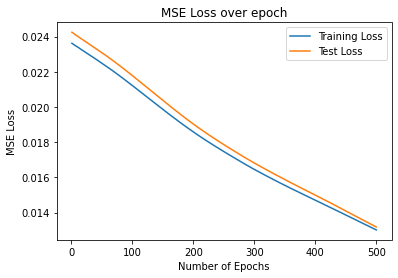

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,500,500)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

training_r2_score: 0.6932164999216968
test_r2_score: 0.6955217133272924


In [ ]:
0.05, smallest
training_r2_score: 0.8826445744739496
test_r2_score: 0.8983564037861

In [ ]:
## 2000 epochs

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(1500):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/1500, Loss={loss.item():.4f} ')

Epoch 25/1500, Loss=0.0484 
Epoch 50/1500, Loss=0.0347 
Epoch 75/1500, Loss=0.0308 
Epoch 100/1500, Loss=0.0283 
Epoch 125/1500, Loss=0.0268 
Epoch 150/1500, Loss=0.0259 
Epoch 175/1500, Loss=0.0253 
Epoch 200/1500, Loss=0.0249 
Epoch 225/1500, Loss=0.0247 
Epoch 250/1500, Loss=0.0245 
Epoch 275/1500, Loss=0.0244 
Epoch 300/1500, Loss=0.0242 
Epoch 325/1500, Loss=0.0241 
Epoch 350/1500, Loss=0.0240 
Epoch 375/1500, Loss=0.0238 
Epoch 400/1500, Loss=0.0237 
Epoch 425/1500, Loss=0.0235 
Epoch 450/1500, Loss=0.0234 
Epoch 475/1500, Loss=0.0232 
Epoch 500/1500, Loss=0.0231 
Epoch 525/1500, Loss=0.0229 
Epoch 550/1500, Loss=0.0227 
Epoch 575/1500, Loss=0.0226 
Epoch 600/1500, Loss=0.0224 
Epoch 625/1500, Loss=0.0222 
Epoch 650/1500, Loss=0.0220 
Epoch 675/1500, Loss=0.0219 
Epoch 700/1500, Loss=0.0217 
Epoch 725/1500, Loss=0.0215 
Epoch 750/1500, Loss=0.0213 
Epoch 775/1500, Loss=0.0211 
Epoch 800/1500, Loss=0.0210 
Epoch 825/1500, Loss=0.0208 
Epoch 850/1500, Loss=0.0206 
Epoch 875/1500, L

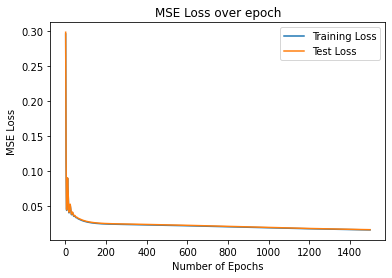

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,1500,1500)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

training_r2_score: 0.6260889159304882
test_r2_score: 0.6260108426340394


## Inference 시간 측정

In [ ]:
# inference 위한 가상 데이터
ko = pd.DataFrame(train_scaled)
ko.mean()

0   -3.812903e-17
1    3.310881e-17
2   -2.756501e-17
3   -1.880272e-17
4    2.014247e-17
5   -1.754859e-15
6    1.748145e-16
7   -1.105680e-16
8   -1.162966e-16
dtype: float64

In [ ]:
test = ko.mean().to_numpy()
test = test.reshape(1,9)
test

array([[-3.81290271e-17,  3.31088079e-17, -2.75650075e-17,
        -1.88027230e-17,  2.01424747e-17, -1.75485921e-15,
         1.74814506e-16, -1.10568019e-16, -1.16296613e-16]])

In [ ]:
import time
import numpy as np
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})


start = time.time()
y_pred = lr.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table = pd.DataFrame(columns = ['model', 'Time'])
time_table.loc[0] = ['Linear Regression', eval_time]
time_table

,model,Time
0,Linear Regression,0.0004


In [ ]:
start = time.time()
y_pred = ridge.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[1] = ['Ridge', eval_time]
time_table

,model,Time
0,Linear Regression,0.00040
1,Ridge,0.00026


In [ ]:
start = time.time()
y_pred = lasso.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[2] = ['Lasso',eval_time]
time_table

,model,Time
0,Linear Regression,0.00040
1,Ridge,0.00026
2,Lasso,0.00041


In [ ]:
start = time.time()
y_pred = dt.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[3] = ['Decision Tree',eval_time]
time_table

,model,Time
0,Linear Regression,0.00040
1,Ridge,0.00026
2,Lasso,0.00041
3,Decision Tree,0.00037


In [ ]:
start = time.time()
y_pred = forest.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[4] = ['Random Forest',eval_time]
time_table

,model,Time
0,Linear Regression,0.00040
1,Ridge,0.00026
2,Lasso,0.00041
3,Decision Tree,0.00037
4,Random Forest,0.02391


In [ ]:
start = time.time()
y_pred = gbr.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[5] = ['GBR',eval_time]
time_table

,model,Time
0,Linear Regression,0.00040
1,Ridge,0.00026
2,Lasso,0.00041
3,Decision Tree,0.00037
4,Random Forest,0.02391
5,GBR,0.00087


In [ ]:
start = time.time()
y_pred = abr.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[6] = ['AdaBoost',eval_time]
time_table

,model,Time
0,Linear Regression,0.00040
1,Ridge,0.00026
2,Lasso,0.00041
3,Decision Tree,0.00037
4,Random Forest,0.02391
5,GBR,0.00087
6,AdaBoost,0.01050


In [ ]:
start = time.time()
y_pred = svr.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[7] = ['SVR',eval_time]
time_table

,model,Time
0,Linear Regression,0.00040
1,Ridge,0.00026
2,Lasso,0.00041
3,Decision Tree,0.00037
4,Random Forest,0.02391
5,GBR,0.00087
6,AdaBoost,0.01050
7,SVR,0.00067


In [ ]:
start = time.time()
y_pred = knn.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[8] = ['KNN',eval_time]
time_table

,model,Time
0,Linear Regression,0.00040
1,Ridge,0.00026
2,Lasso,0.00041
3,Decision Tree,0.00037
4,Random Forest,0.02391
5,GBR,0.00087
6,AdaBoost,0.01050
7,SVR,0.00067
8,KNN,0.00469


In [ ]:
test = torch.tensor(test, dtype=torch.float32)
test = test.to(device)

In [ ]:
test

tensor([[-3.8129e-17,  3.3109e-17, -2.7565e-17, -1.8803e-17,  2.0142e-17,
         -1.7549e-15,  1.7481e-16, -1.1057e-16, -1.1630e-16]], device='cuda:0')

In [ ]:
type(test)

torch.Tensor

In [ ]:
start = time.time()
y_pred = model(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[9] = ['DNN',eval_time]
time_table

,model,Time
0,Linear Regression,0.00040
1,Ridge,0.00026
2,Lasso,0.00041
3,Decision Tree,0.00037
4,Random Forest,0.02391
5,GBR,0.00087
6,AdaBoost,0.01050
7,SVR,0.00067
8,KNN,0.00469
9,DNN,0.00223


In [ ]:
time_table_copy = time_table.copy()
time_table_copy.columns  = ['Model', 'Time']

In [ ]:
time_table_copy.index = time_table_copy['Model']
inference_time = pd.DataFrame(time_table_copy['Time']).T

In [ ]:
inference_time

Model,Linear Regression,Ridge,Lasso,Decision Tree,Random Forest,GBR,AdaBoost,SVR,KNN,DNN
Time,0.0004,0.00026,0.00041,0.00037,0.02391,0.00087,0.0105,0.00067,0.00469,0.00223


In [ ]:
inference_time['Mean Time'] = inference_time.mean(axis = 1)
inference_time


Model,Linear Regression,Ridge,Lasso,Decision Tree,Random Forest,GBR,AdaBoost,SVR,KNN,DNN,Mean Time
Time,0.0004,0.00026,0.00041,0.00037,0.02391,0.00087,0.0105,0.00067,0.00469,0.00223,0.004431


In [ ]:
10/inference_time['Mean Time']

Time    2256.826901
Name: Mean Time, dtype: float64

In [ ]:
10/inference_time['GBR']

Time    11494.252874
Name: GBR, dtype: float64

In [ ]:
10/inference_time['DNN']

Time    4484.304933
Name: DNN, dtype: float64

## CNN with Keras

In [ ]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
train_scaled_tensor = torch.tensor(train_scaled_tensor, dtype = torch.float32)
test_scaled_tensor = torch.tensor(test_scaled_tensor, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train_tensor, dtype = torch.float32)
y_test_tensor =  torch.tensor(y_test_tensor, dtype = torch.float32)


In [ ]:
train_scaled_tensor.shape

torch.Size([117494, 9])

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(9,1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(scaled_X, y, batch_size=12,epochs=200, verbose=0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 8, 32)             96        
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,609
Trainable params: 16,609
Non-trainable params: 0
_________________________________________________________________


KeyboardInterrupt: ignored

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics= ['MAPE'])

In [ ]:
hist = model.fit(scaled_X, y, epochs = 100, validation_split = 0.3)

## Deep Learning Model(Keras) -- 사용안함


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_features_ohe)

scaled_X = ss.transform(X_features_ohe)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import optimizers

In [ ]:
import tensorflow as tf


In [ ]:
tf.random.set_seed(5)

In [ ]:
model = Sequential()
model.add(layers.Dense(units= 14, input_shape=(9,), activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 1, activation = 'relu'))



In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics= ['MAPE'])

In [ ]:
# model.compile(loss = 'mean_absolute_percentage_error', optimizer = 'adam', metrics= ['mean_absolute_percentage_error'])


In [ ]:
hist = model.fit(scaled_X, y, epochs = 100, validation_split = 0.3)

Epoch 1/100
3672/3672 [==============================] - 15s 4ms/step - loss: 0.0167 - MAPE: 30.0809 - val_loss: 0.0424 - val_MAPE: 90.2082
Epoch 2/100
3672/3672 [==============================] - 14s 4ms/step - loss: 0.0113 - MAPE: 27.8383 - val_loss: 0.3437 - val_MAPE: 229.6418
Epoch 3/100
3672/3672 [==============================] - 18s 5ms/step - loss: 0.0096 - MAPE: 26.7261 - val_loss: 0.4087 - val_MAPE: 242.9565
Epoch 4/100
3672/3672 [==============================] - 12s 3ms/step - loss: 0.0090 - MAPE: 25.8762 - val_loss: 0.3174 - val_MAPE: 216.9653
Epoch 5/100
3672/3672 [==============================] - 13s 3ms/step - loss: 0.0080 - MAPE: 25.0519 - val_loss: 0.2980 - val_MAPE: 212.3912
Epoch 6/100
3672/3672 [==============================] - 13s 4ms/step - loss: 0.0082 - MAPE: 25.1272 - val_loss: 0.1918 - val_MAPE: 165.0844
Epoch 7/100
3672/3672 [==============================] - 13s 3ms/step - loss: 0.0078 - MAPE: 25.0129 - val_loss: 0.1502 - val_MAPE: 149.5496
Epoch 8/100
36

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                140       
                                                                 
 dense_1 (Dense)             (None, 14)                210       
                                                                 
 dense_2 (Dense)             (None, 14)                210       
                                                                 
 dense_3 (Dense)             (None, 14)                210       
                                                                 
 dense_4 (Dense)             (None, 14)                210       
                                                                 
 dense_5 (Dense)             (None, 14)                210       
                                                                 
 dense_6 (Dense)             (None, 14)                2

In [ ]:
# model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics= ['RootMeanSquaredError'])

In [ ]:
# hist1 = model.fit(X_features_ohe, y, epochs = 10, validation_split = 0.3)

Epoch 1/10
3672/3672 [==============================] - 22s 6ms/step - loss: 0.1548 - root_mean_squared_error: 0.3934 - val_loss: 0.1113 - val_root_mean_squared_error: 0.3335
Epoch 2/10
3672/3672 [==============================] - 19s 5ms/step - loss: 0.1548 - root_mean_squared_error: 0.3934 - val_loss: 0.1113 - val_root_mean_squared_error: 0.3335
Epoch 3/10
3672/3672 [==============================] - 19s 5ms/step - loss: 0.1548 - root_mean_squared_error: 0.3934 - val_loss: 0.1113 - val_root_mean_squared_error: 0.3335
Epoch 4/10
3672/3672 [==============================] - 21s 6ms/step - loss: 0.1548 - root_mean_squared_error: 0.3934 - val_loss: 0.1113 - val_root_mean_squared_error: 0.3335
Epoch 5/10
3672/3672 [==============================] - 21s 6ms/step - loss: 0.1548 - root_mean_squared_error: 0.3934 - val_loss: 0.1113 - val_root_mean_squared_error: 0.3335
Epoch 6/10
3672/3672 [==============================] - 19s 5ms/step - loss: 0.1548 - root_mean_squared_error: 0.3934 - val_l

In [ ]:
import matplotlib.pyplot as plt

def drawHistory(hist):
  fig = plt.figure(figsize= (15,10))
  loss_ax = plt.gca()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label = 'test loss')
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc = 'lower left')

  acc_ax.plot(hist.history['MAPE'], 'b', label = 'train MAPE')
  acc_ax.plot(hist.history['val_MAPE'], 'g', label = 'test MAPE')
  acc_ax.set_ylabel('MAPE')
  acc_ax.legend(loc = 'upper left')

  plt.show()

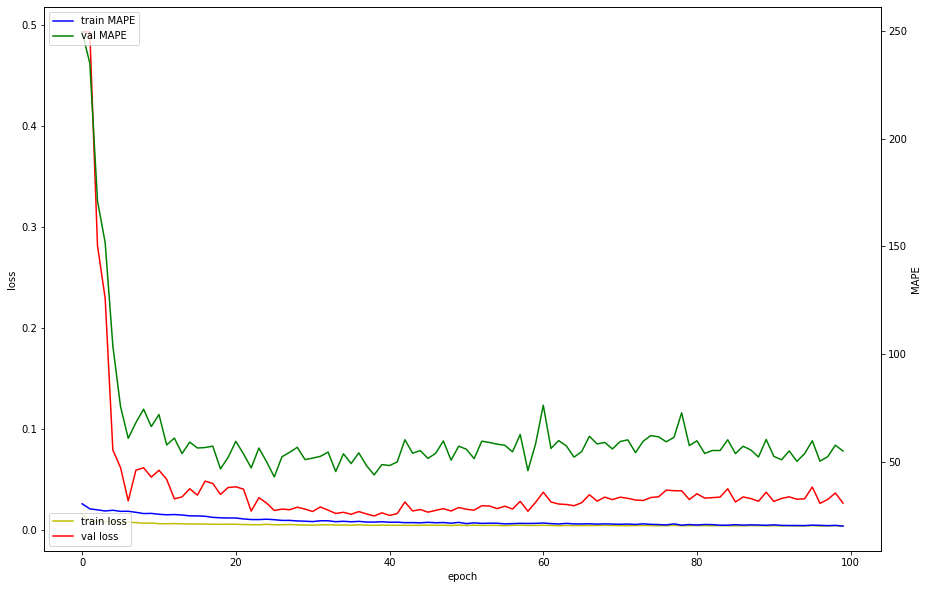

In [ ]:
drawHistory(hist)